# 1.가설: 음주 여부에 따라 건강검진 수치 차이가 있을까?
# 2.가설: 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 3. 라이브러리 로드

# 4. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")

In [4]:
df.shape

(1000000, 34)

# 5. 데이터 미리보기

In [5]:
df.head(3)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0     N         Y      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0     N         N      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN    Y  2018-11-26  
1           NaN  NaN  2018-11-26  
2           NaN  NaN  2018-11-26  

[3 rows x 34 columns]

In [6]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
837021  2017   837022     2           13    47        155         65  83.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
837021    1.2    1.0  ...   14.0   1.0     N         Y      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석     데이터공개일자  
837021      NaN           NaN   N  2018-11-26  

[1 rows x 34 columns]

# 6. 기본정보 보기

In [7]:
df.info() #다양한 정보 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [8]:
#column만 따로 출력
df.columns


Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [9]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

# 7. 결측치 보기

In [10]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [140]:
df.isnull().mean()

기준년도            0.000000
가입자일련번호         0.000000
성별코드            0.000000
연령대코드(5세단위)     0.000000
시도코드            0.000000
신장(5Cm단위)       0.000000
체중(5Kg단위)       0.000000
허리둘레            0.000266
시력(좌)           0.000183
시력(우)           0.000189
청력(좌)           0.000158
청력(우)           0.000156
수축기혈압           0.000019
이완기혈압           0.000018
식전혈당(공복혈당)      0.000042
총콜레스테롤          0.000043
트리글리세라이드        0.000045
HDL콜레스테롤        0.000044
LDL콜레스테롤        0.002912
혈색소             0.000052
요단백             0.004592
혈청크레아티닌         0.000043
(혈청지오티)AST      0.000041
(혈청지오티)ALT      0.000042
감마지티피           0.000042
흡연상태            0.000144
음주여부            0.000536
구강검진수검여부        0.000000
치아우식증유무         1.000000
결손치유무           1.000000
치아마모증유무         1.000000
제3대구치(사랑니)이상    1.000000
치석              0.621422
데이터공개일자         0.000000
dtype: float64

In [141]:
df.isnull().median()

기준년도            0.0
가입자일련번호         0.0
성별코드            0.0
연령대코드(5세단위)     0.0
시도코드            0.0
신장(5Cm단위)       0.0
체중(5Kg단위)       0.0
허리둘레            0.0
시력(좌)           0.0
시력(우)           0.0
청력(좌)           0.0
청력(우)           0.0
수축기혈압           0.0
이완기혈압           0.0
식전혈당(공복혈당)      0.0
총콜레스테롤          0.0
트리글리세라이드        0.0
HDL콜레스테롤        0.0
LDL콜레스테롤        0.0
혈색소             0.0
요단백             0.0
혈청크레아티닌         0.0
(혈청지오티)AST      0.0
(혈청지오티)ALT      0.0
감마지티피           0.0
흡연상태            0.0
음주여부            0.0
구강검진수검여부        0.0
치아우식증유무         1.0
결손치유무           1.0
치아마모증유무         1.0
제3대구치(사랑니)이상    1.0
치석              1.0
데이터공개일자         0.0
dtype: float64

In [11]:
#결측치 확인
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<AxesSubplot:>

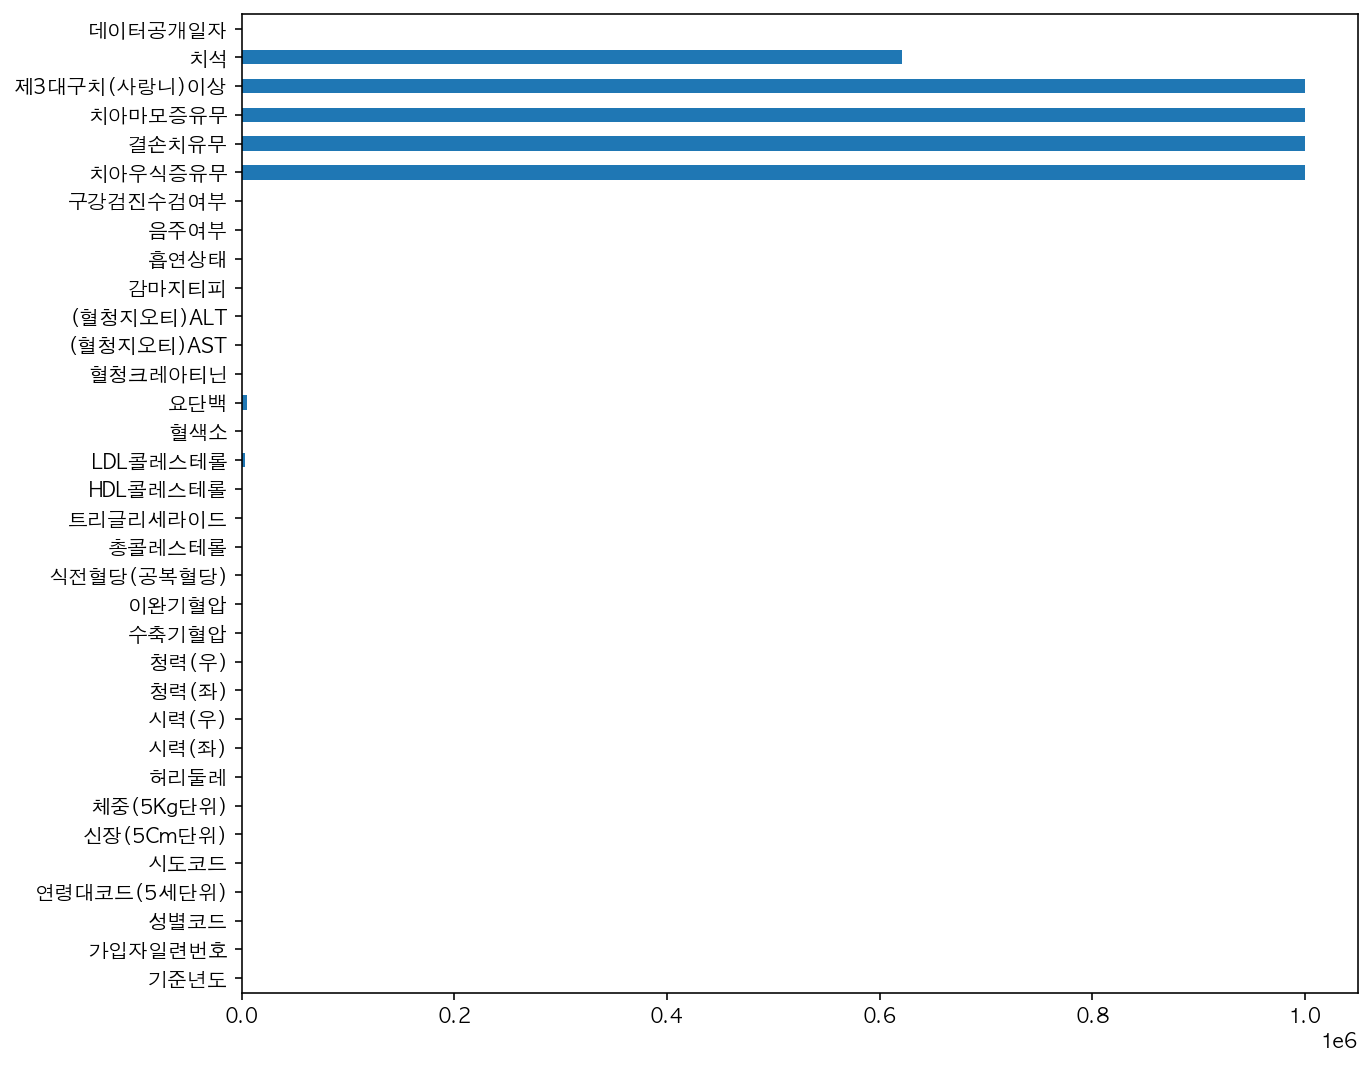

In [12]:
df.isnull().sum().plot.barh(figsize=(10,9))

# 8. 일부 데이터 요약하기

In [13]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [14]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info() #요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# 9. value_counts로 값 집계하기

In [16]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# 10. groupby와 pivot_table사용하기

## 10.1 groupby

In [18]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [19]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [21]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [22]:
#agg을 사용하면 여러 수치를 함께 구할 수 있음
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## 10.2 pivot_table

In [23]:
#pivot은 형태만 바꾸고자 할 때, pivot_table은 연산을 하고자 할 때
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
N      500439
Y      499025

In [24]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
N     26.819650   19.0
Y     47.588675   30.0

In [25]:
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 11. 전체 데이터 시각화 하기
* 100만개가 넘는 데이터를 시각화할때 되도록 groupby or pivot_table사용
* seaborn 사용시 느릴 수 있음(100만개 데이터)

## 11.1 히스토그램

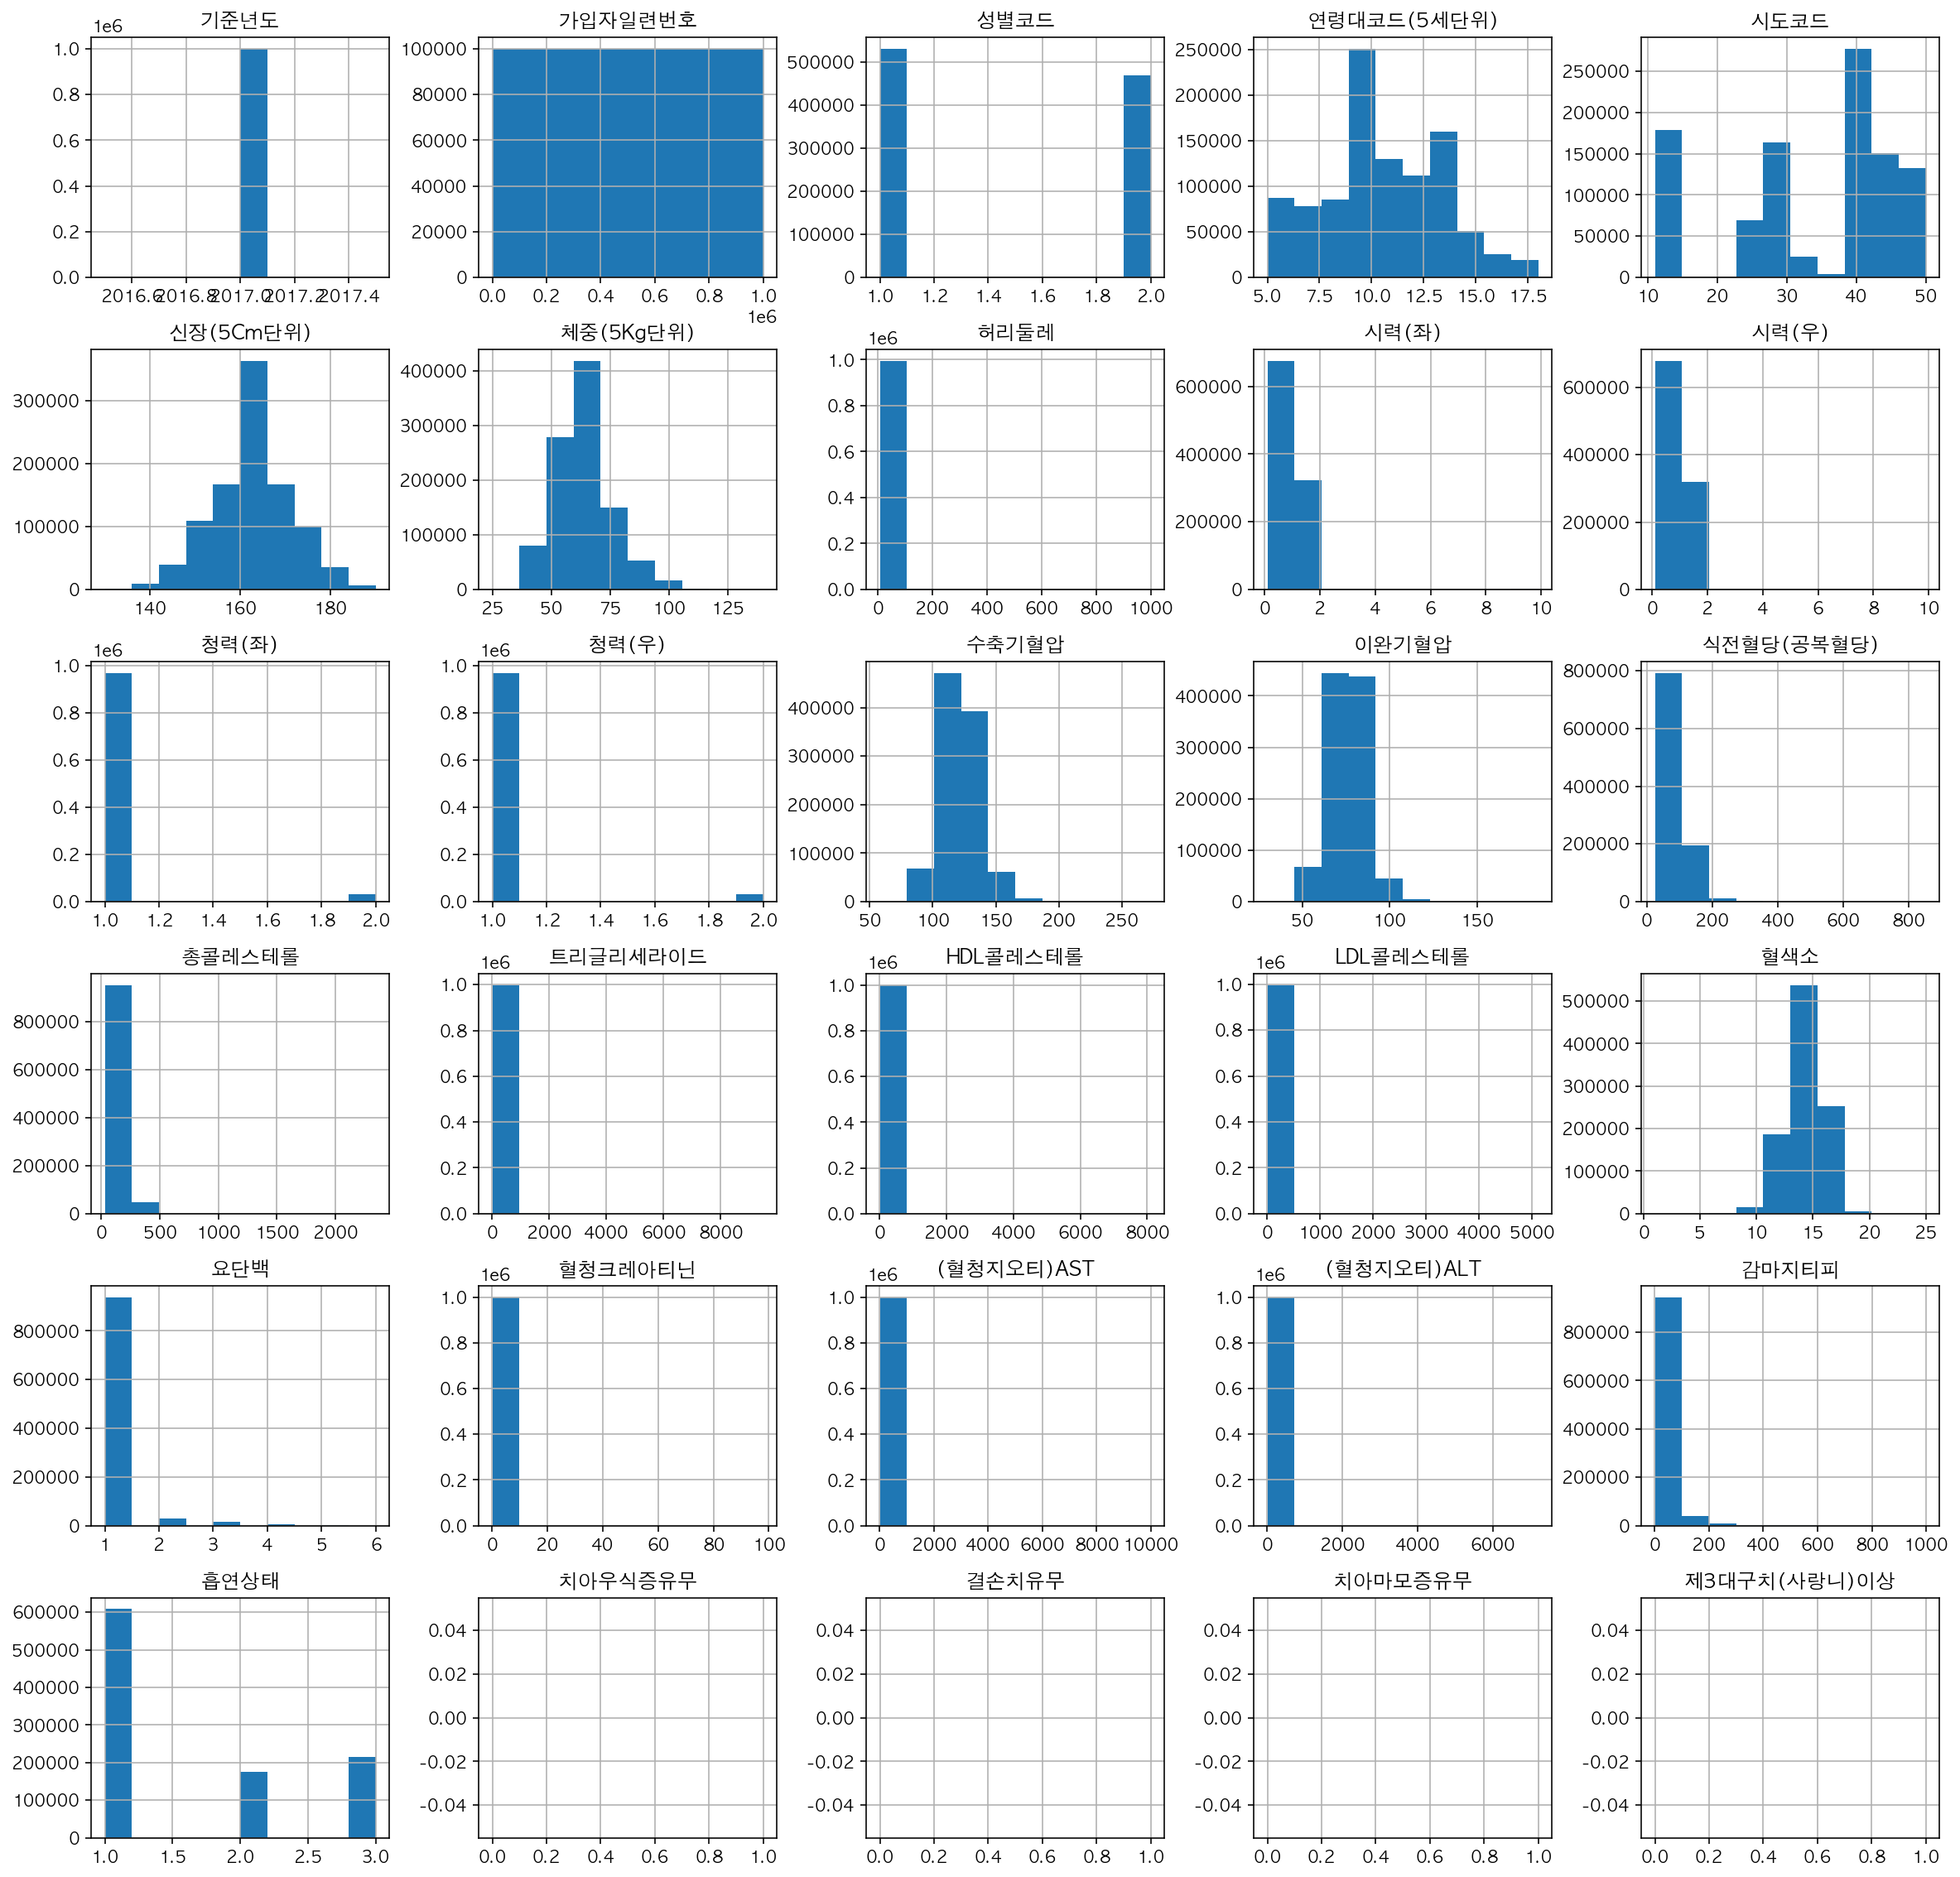

In [26]:
h = df.hist(figsize=(20,20))

## 11.2 슬라이싱 사용하기

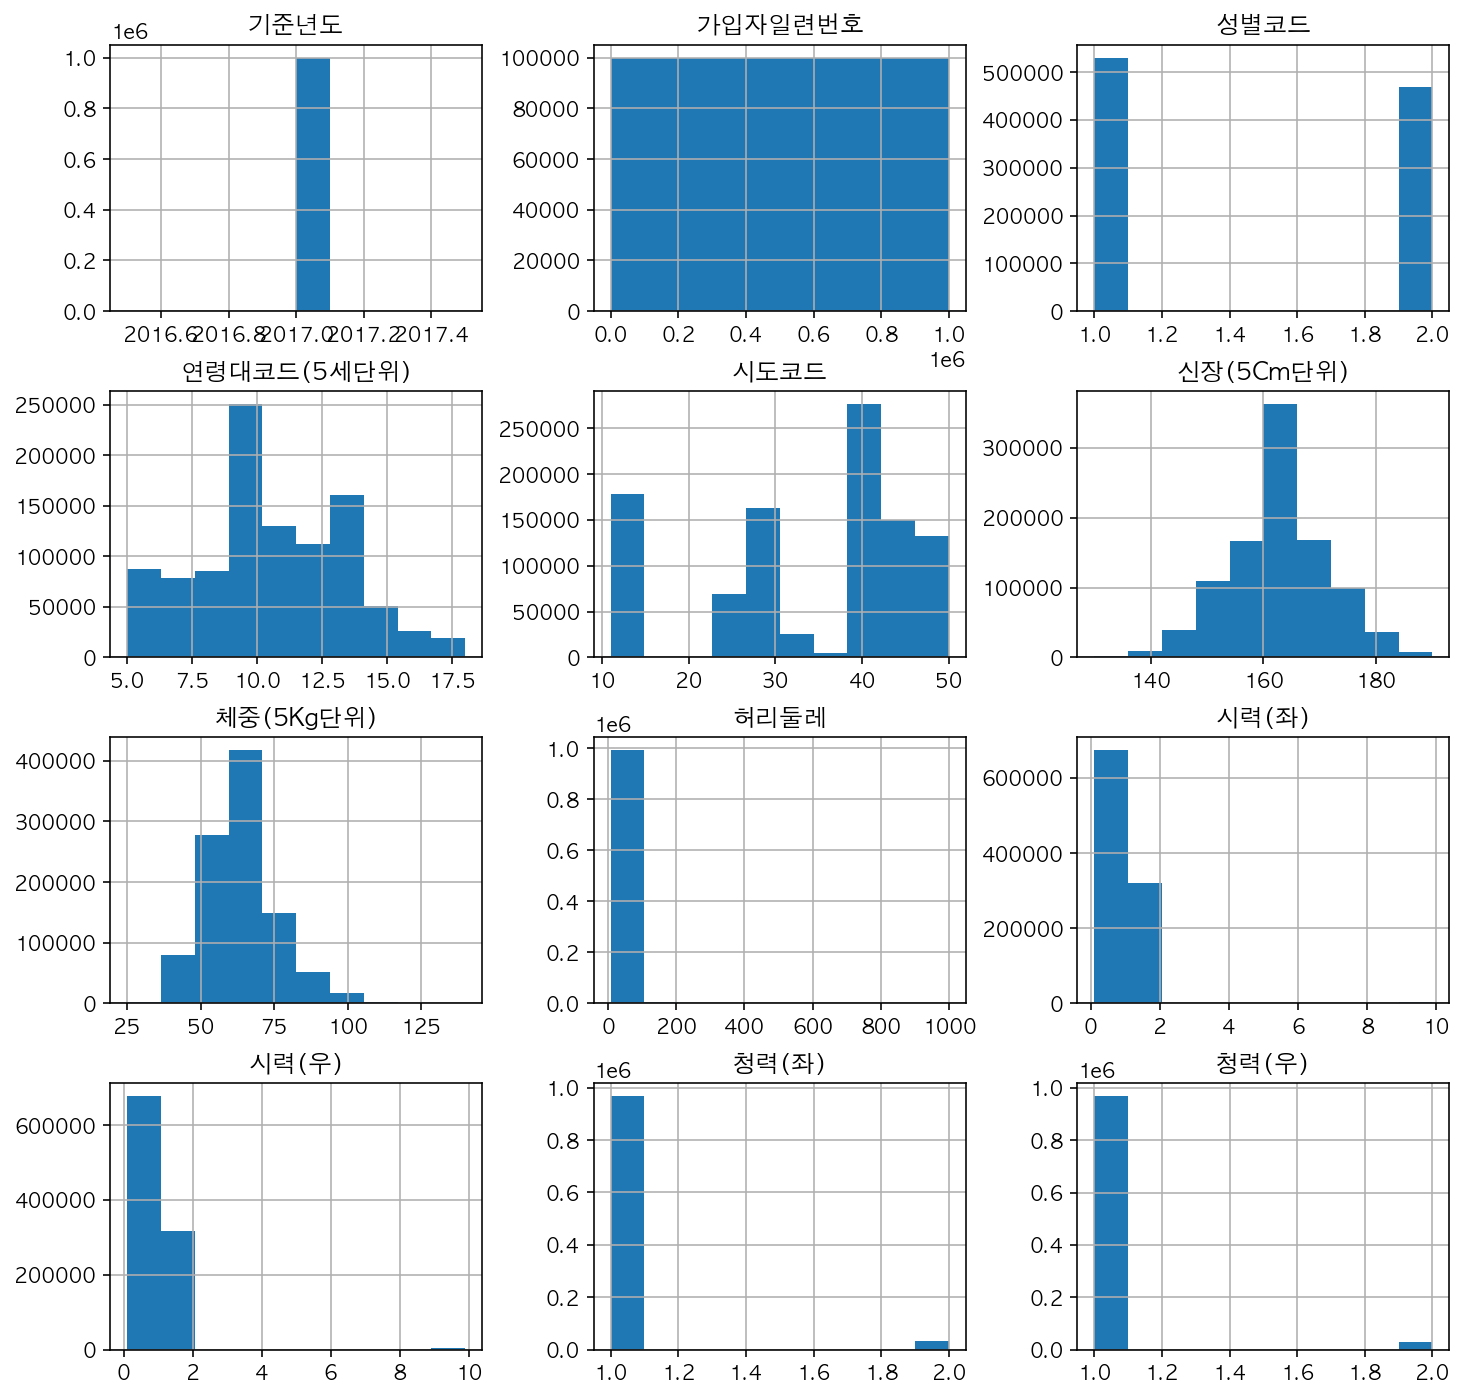

In [27]:
#[행, 열]
h = df.iloc[:,:12].hist(figsize=(12,12))

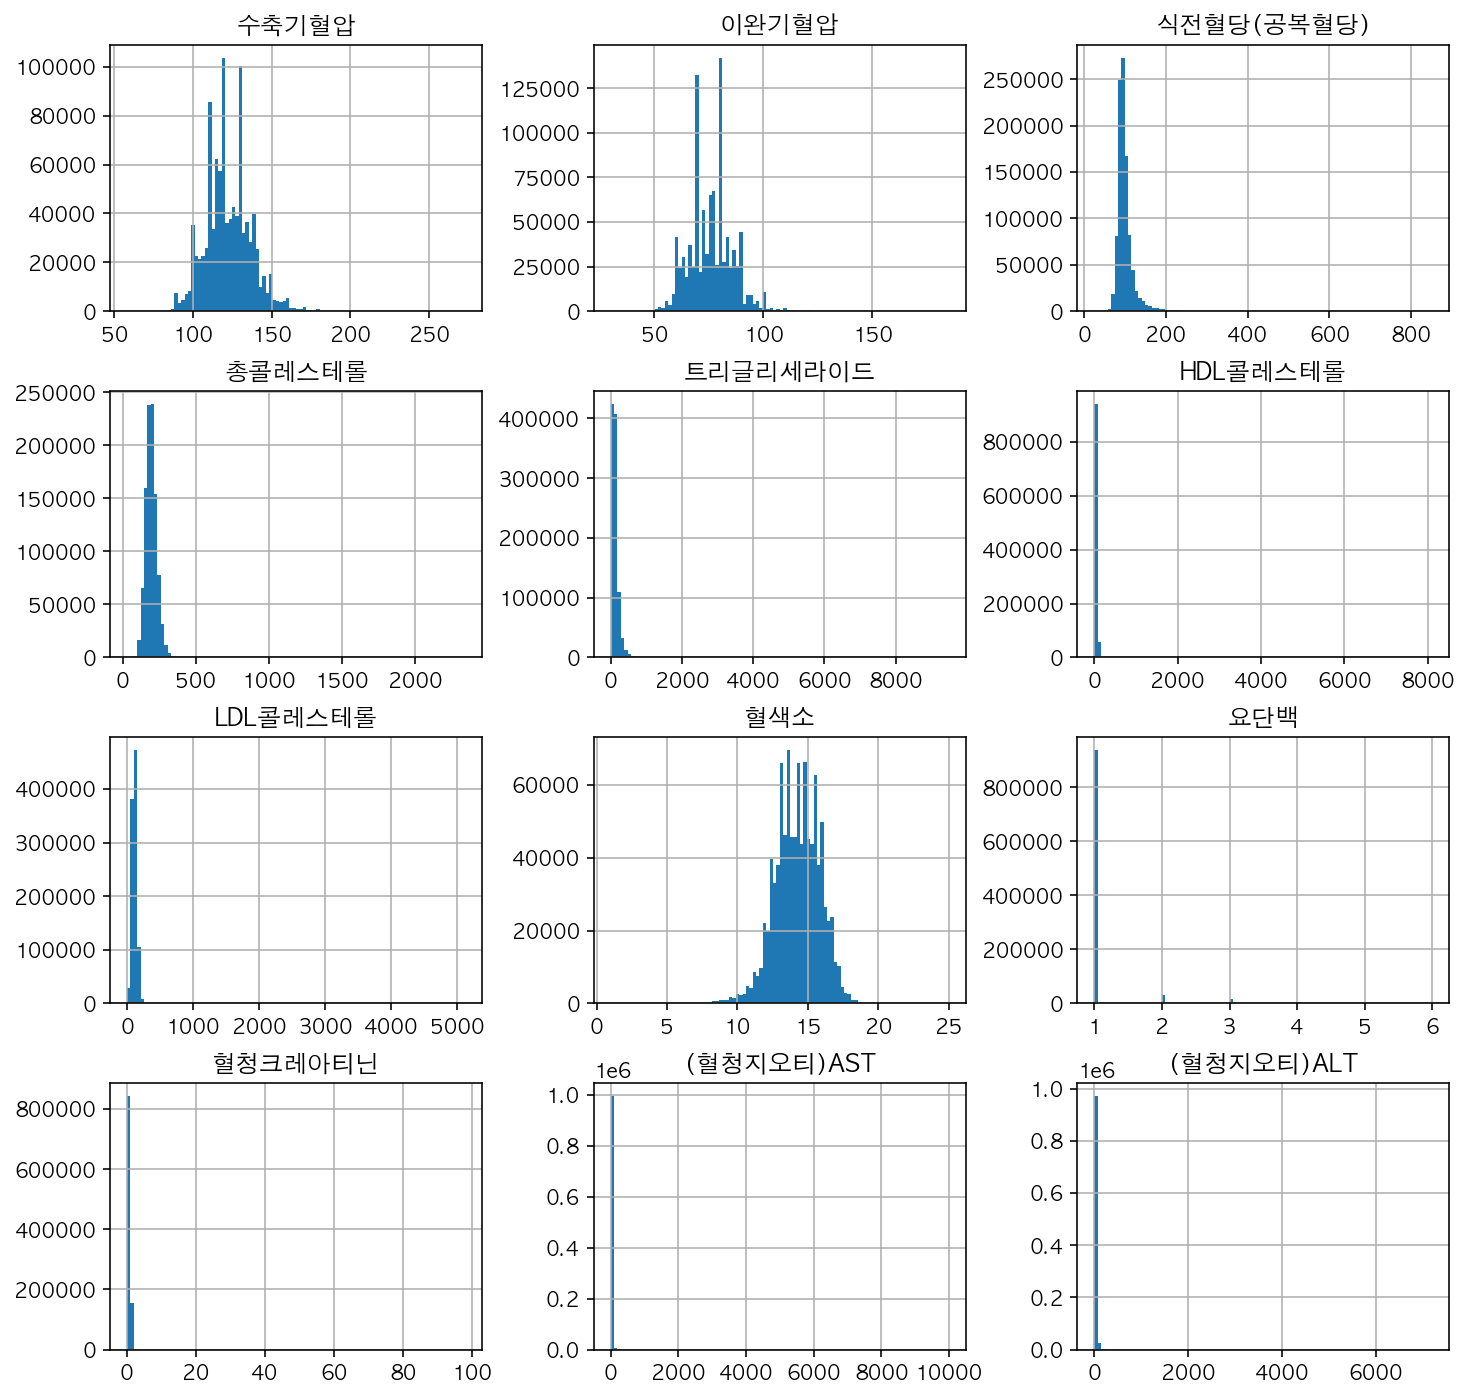

In [28]:
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100) #bins:막대 갯수

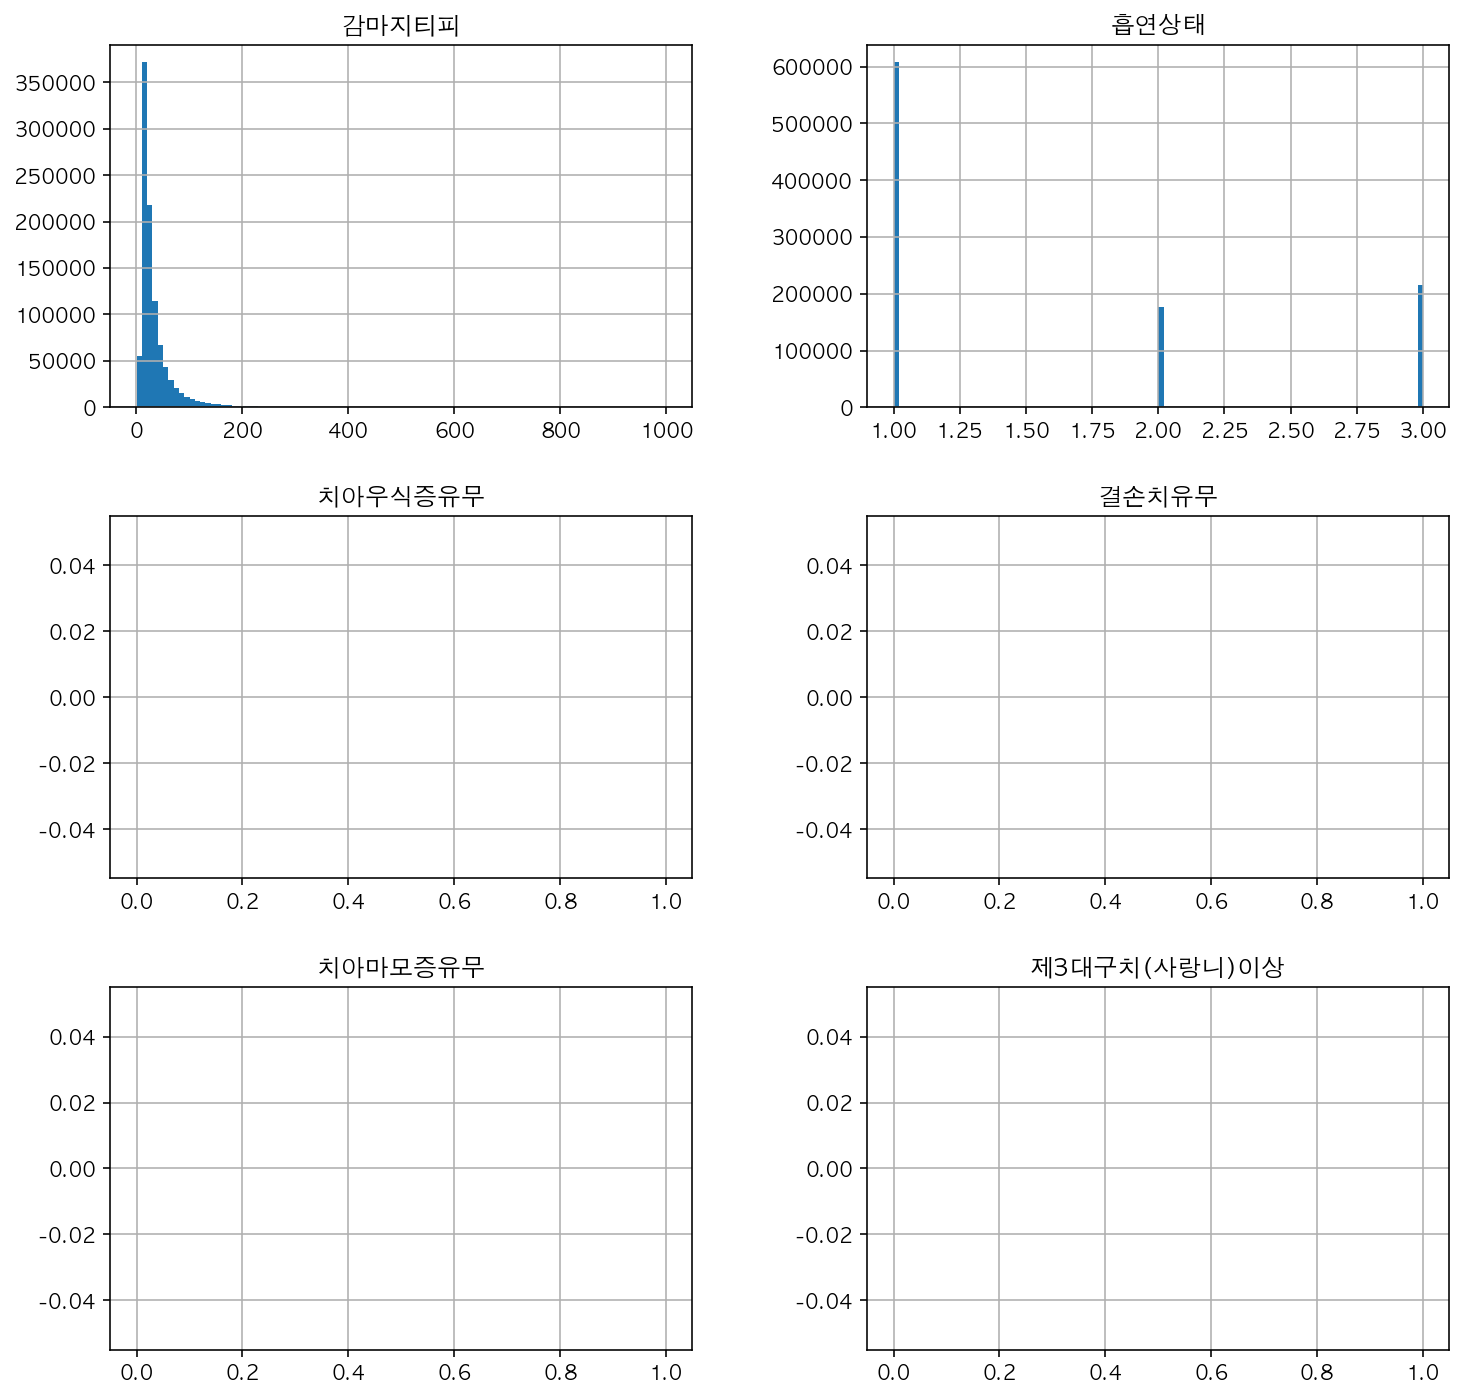

In [29]:
h = df.iloc[:, 24:].hist(figsize=(12,12), bins=100)

# 12. 샘플데이터 추출하기
* 전체 데이터 사용 시 너무 느림. 일부만 샘플링해서 사용ㅋ

In [30]:
df_sample = df.sample(1000, random_state=1) #항상 같은 값 반환하기 위한 random_state
df_sample.shape

(1000, 34)

# 13. 데이터 시각화 도구 Seaborn 사용

# 14. 범주형(카테고리) 데이터 시각화

## 14.1 countplot - 음주여부

<AxesSubplot:>

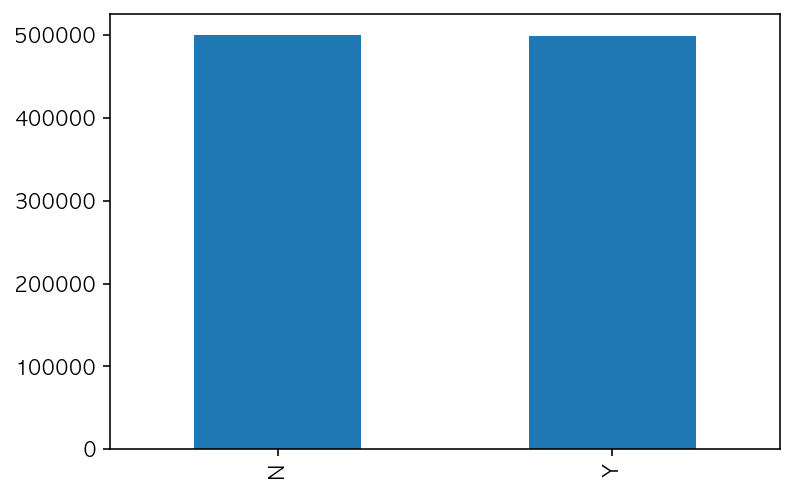

In [31]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

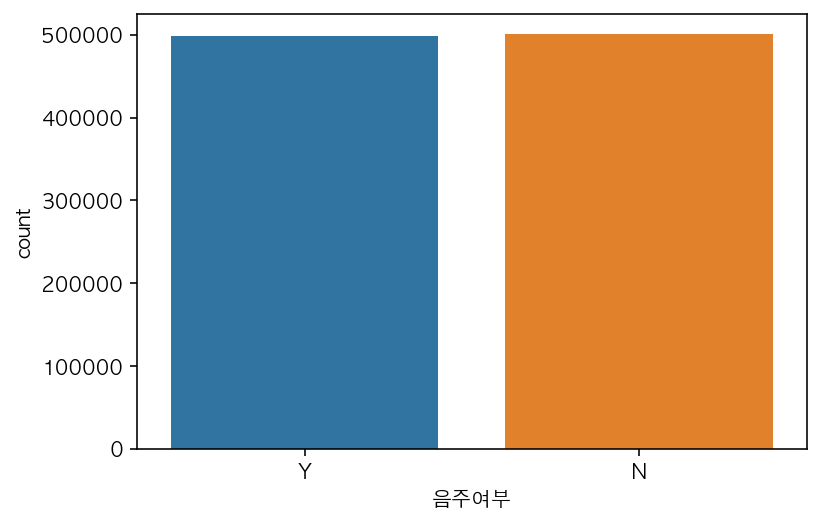

In [32]:
sns.countplot(x="음주여부", data=df)

## 14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

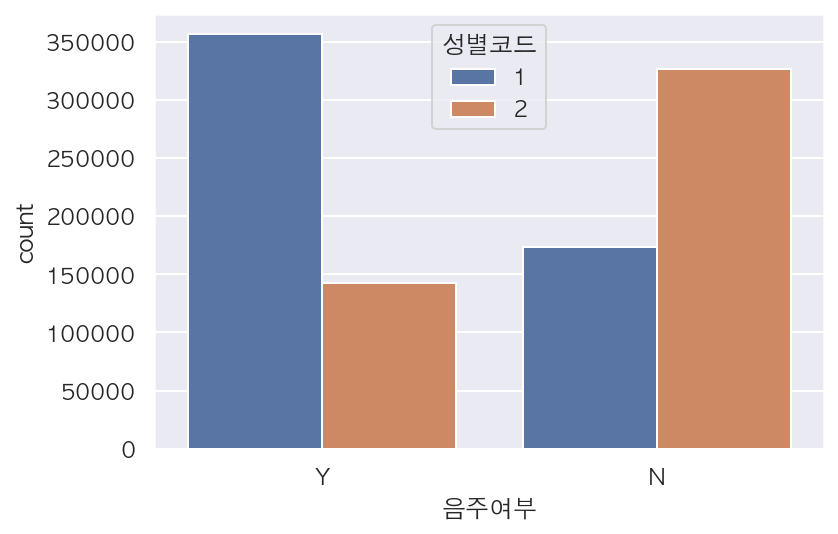

In [33]:
sns.set(font_scale=1.0, font="AppleGothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

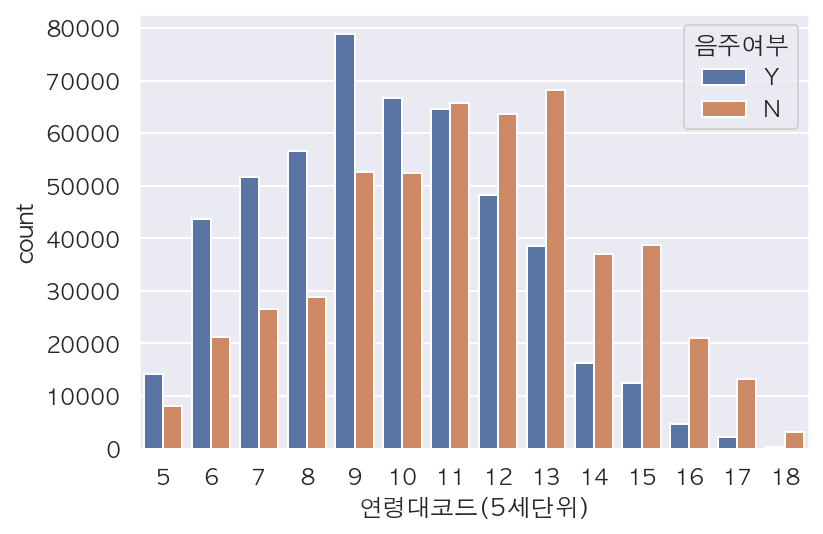

In [34]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## 14.3 countplot - 키와 몸무게

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

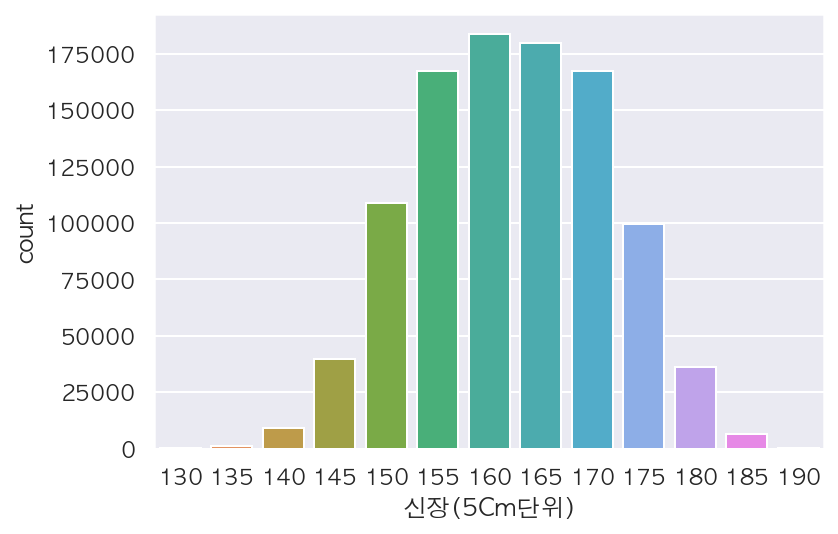

In [35]:
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

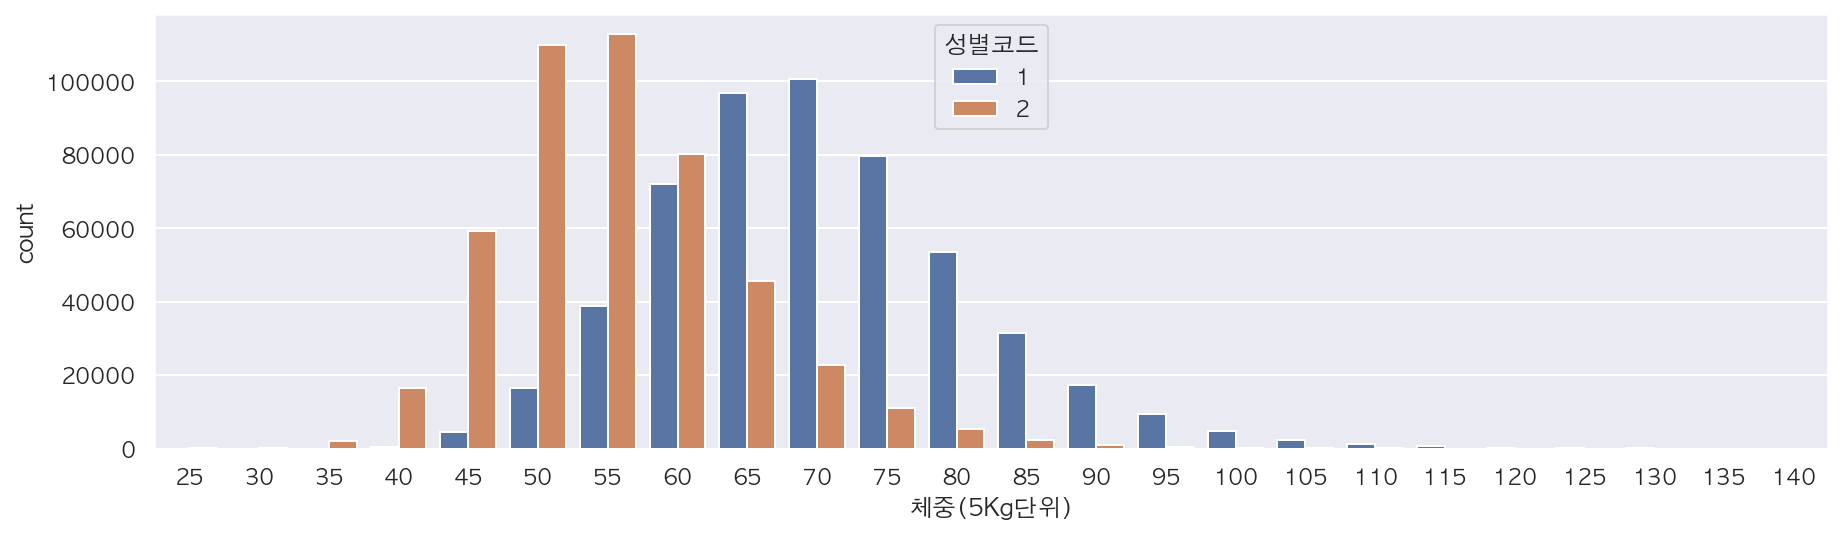

In [36]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

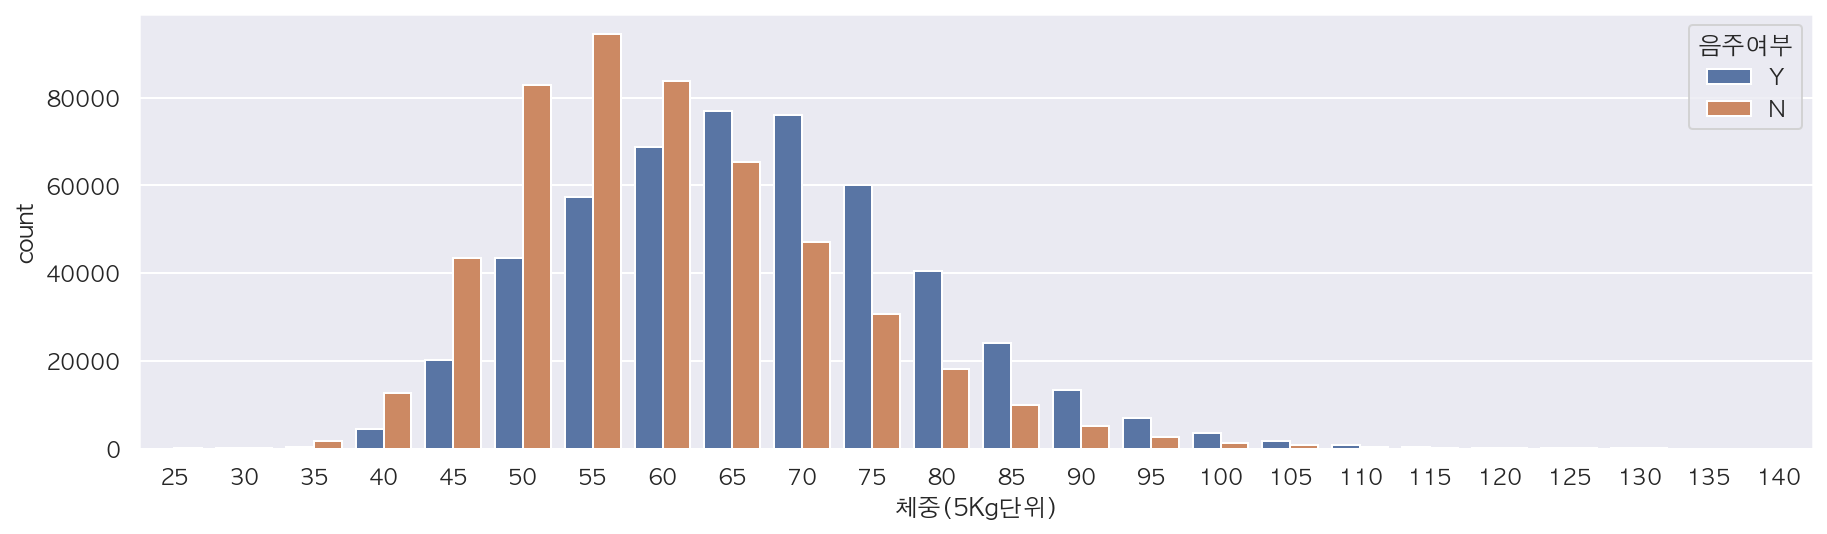

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부")

## 14.4 barplot - 수치형 vs 범주형

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

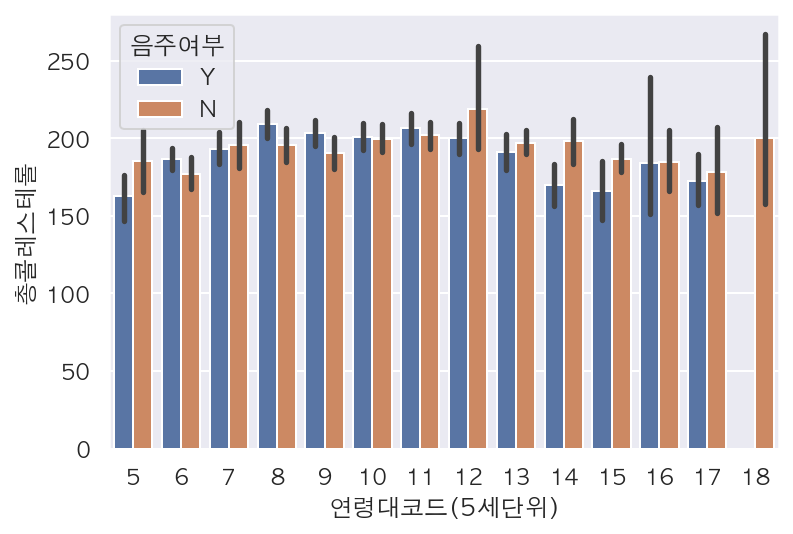

In [38]:
#hue로 색상을 다르게 표현할 수 있음. 음주여부를 함께 봅시다.
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

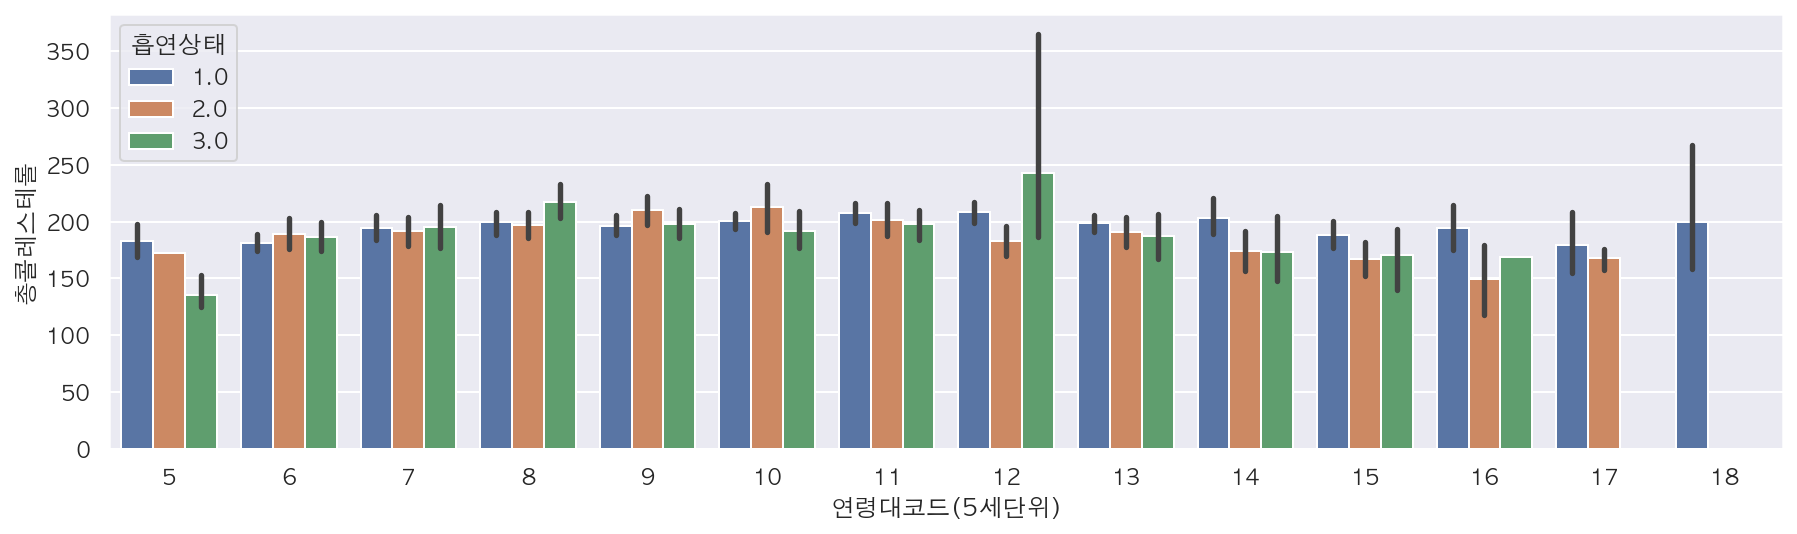

In [39]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

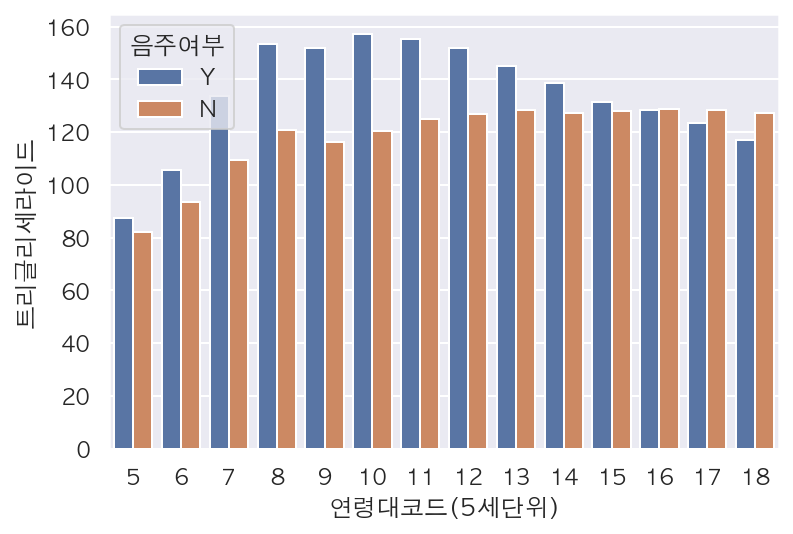

In [40]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)
#검은색 막대 -> 신뢰도 sd, 표준편차로 확인

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

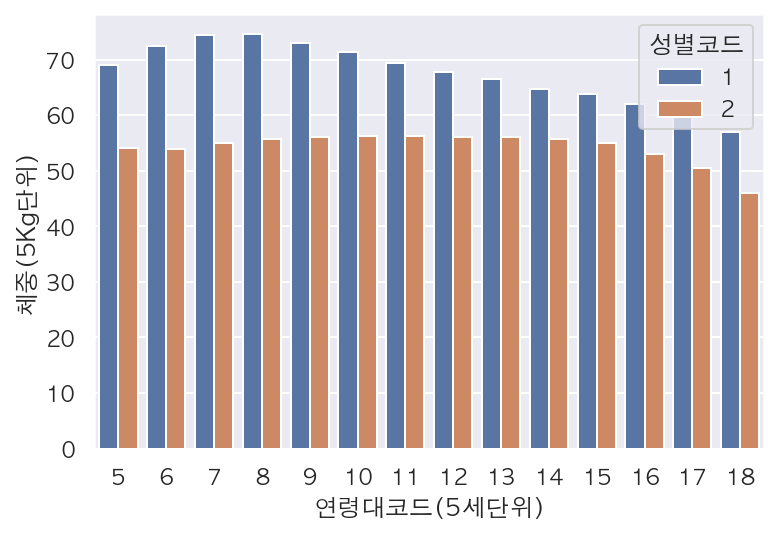

In [41]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

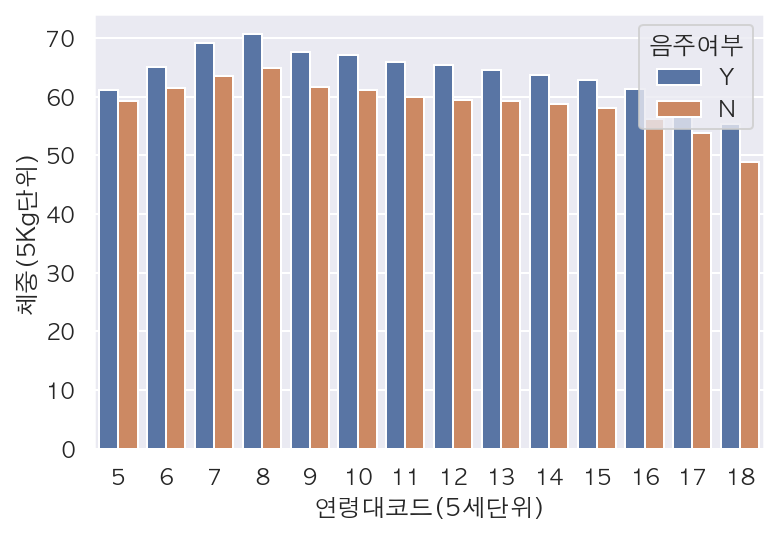

In [42]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

## 14.5 lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

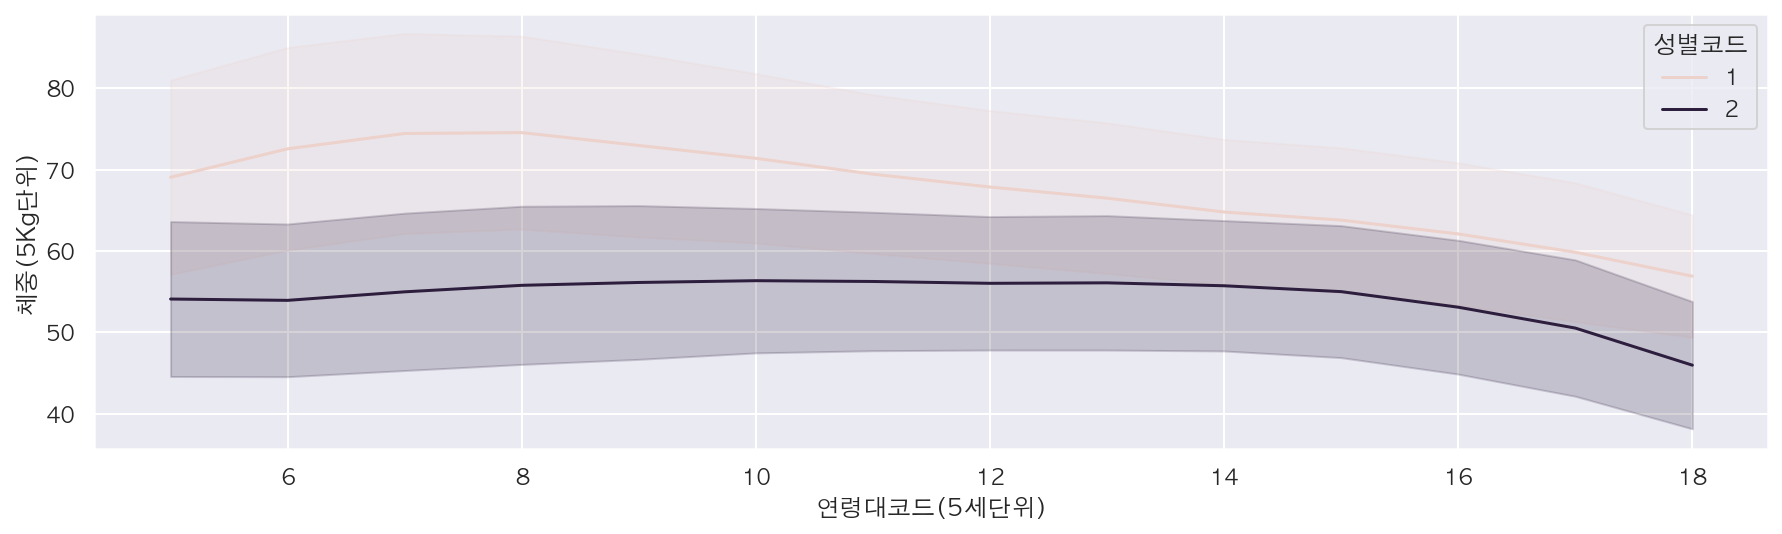

In [43]:
plt.figure(figsize= (15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

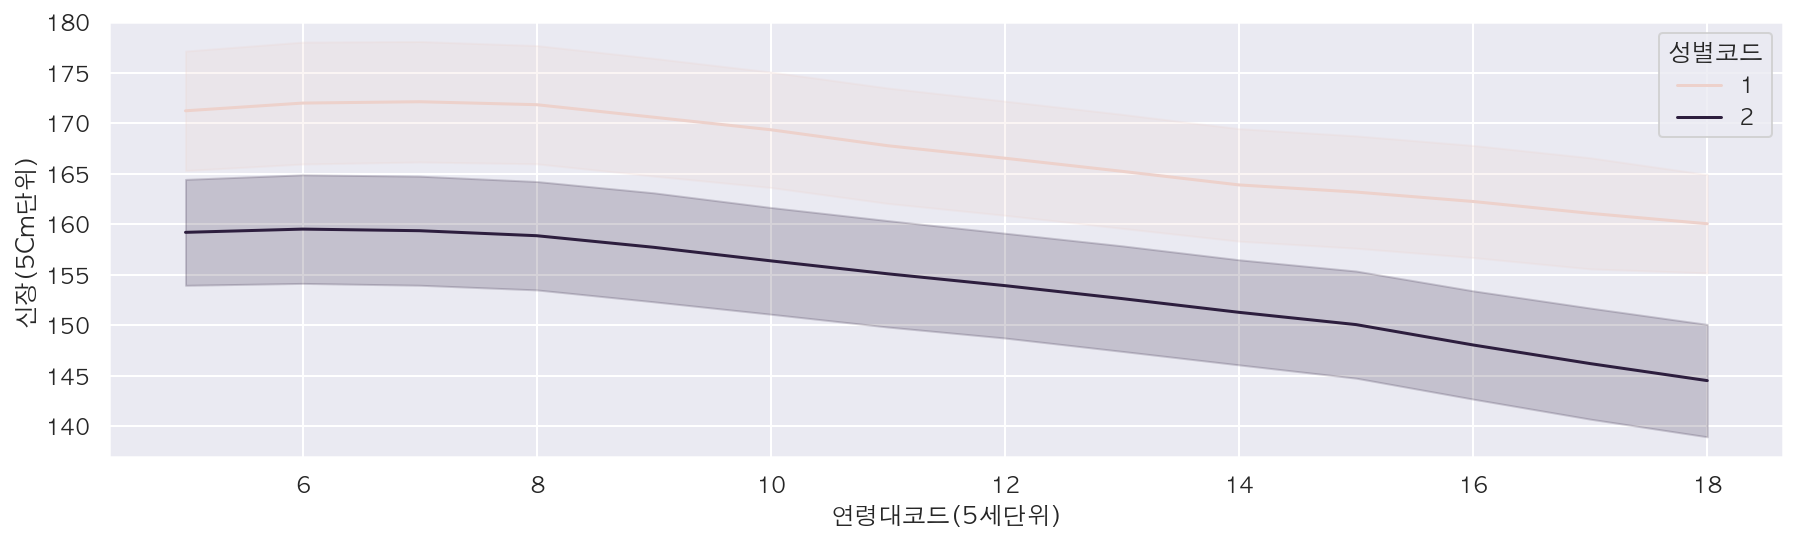

In [44]:
plt.figure(figsize= (15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

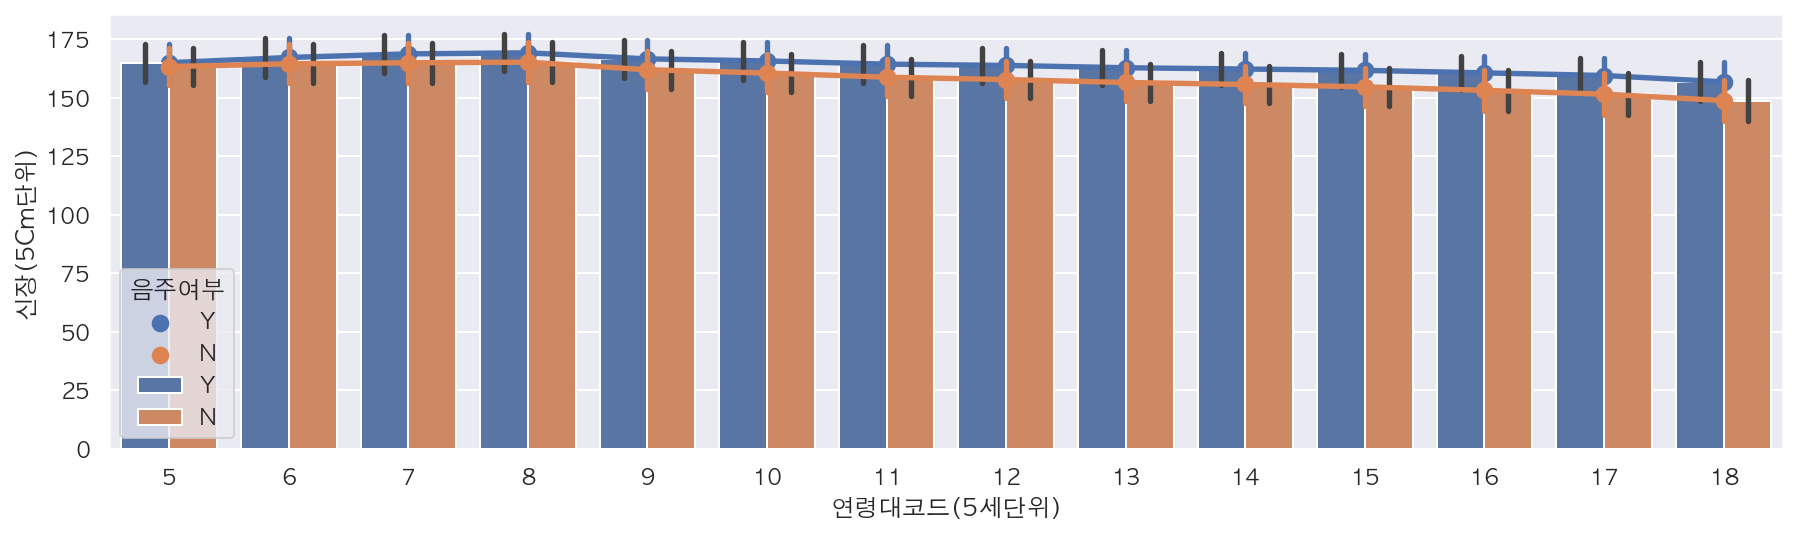

In [45]:
plt.figure(figsize= (15,4))
sns.barplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

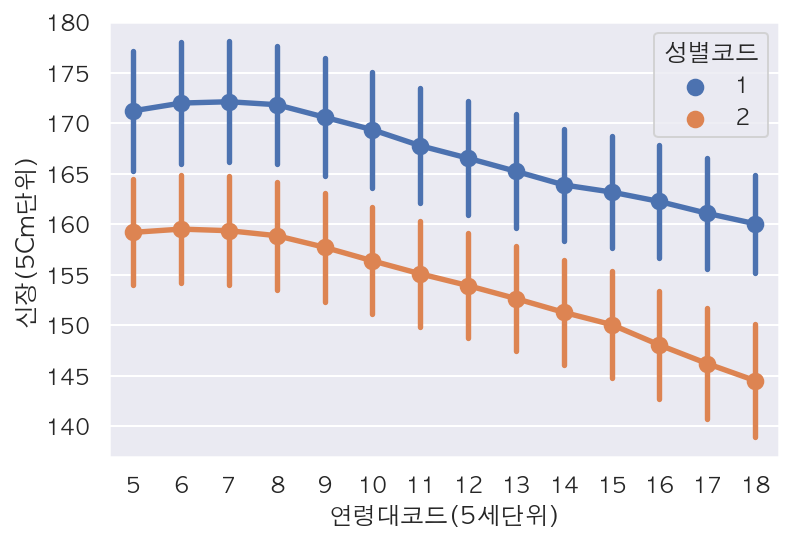

In [46]:
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

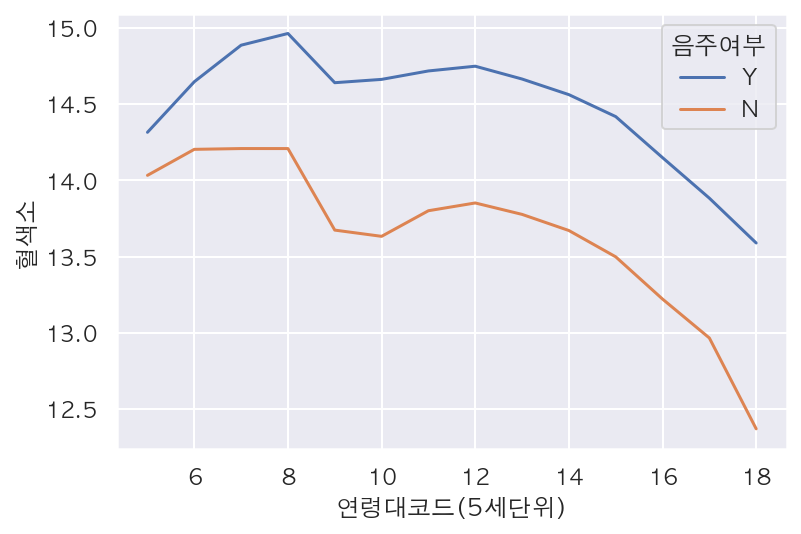

In [47]:
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## 14.6 boxplot

* 최솟값
* 제 1사분위수
* 제2사분위수, 즉 중앙값
* 제3사분위수
* 최댓값
</br>
* 사분위수 범위(IQR: Interquartile range, 제3사 - 제1사
* 이상치점: 제3사보다 1.5IQR 초과하는 값, 제1사보다 1.5IQR 미달하는 값

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

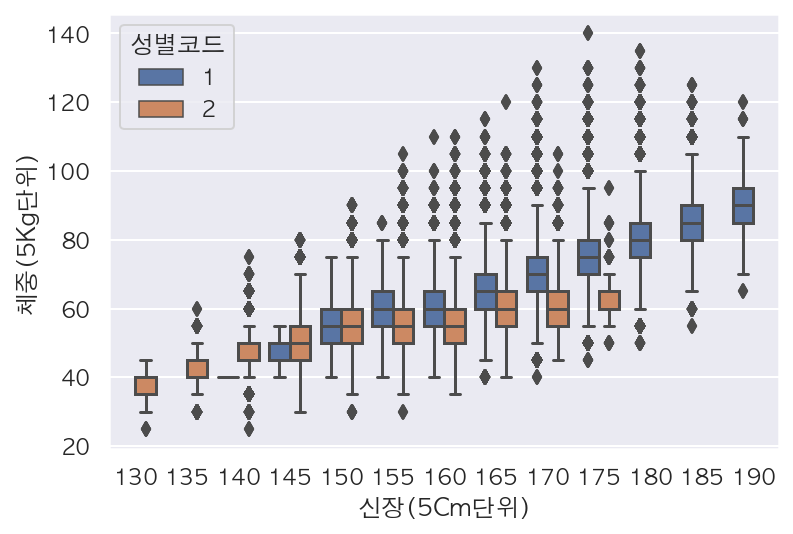

In [48]:
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

## 14.7 violinplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

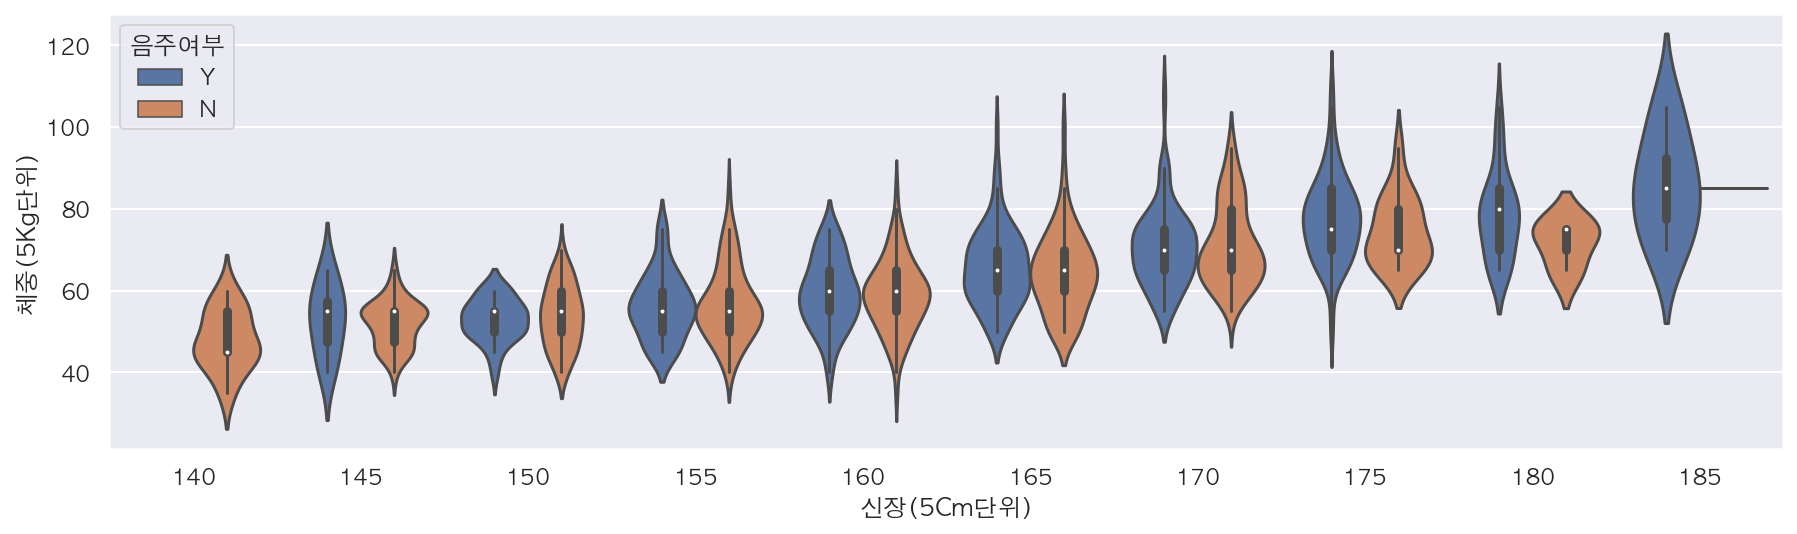

In [49]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

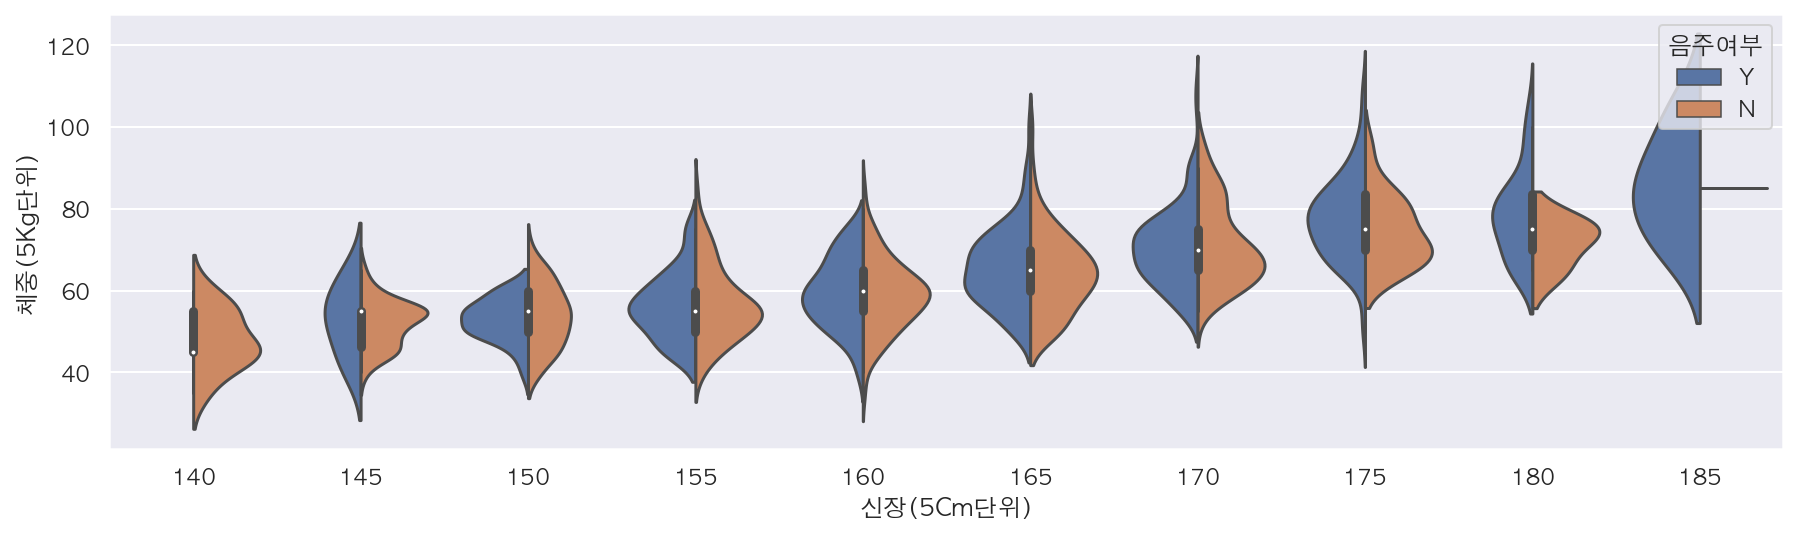

In [50]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", 
               y="체중(5Kg단위)", hue="음주여부", split=True)
#split: 두개의 값을 하나의 그래프로 붙여서 표현

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

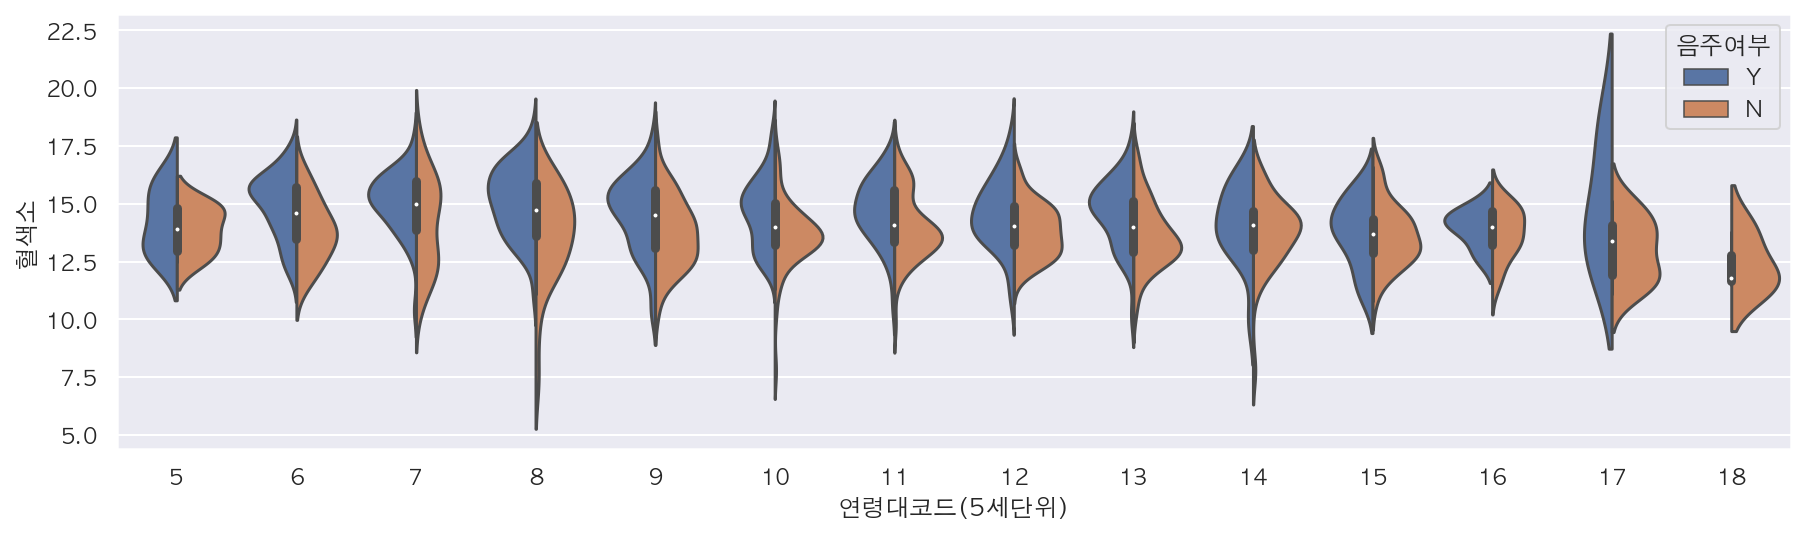

In [51]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", 
               y="혈색소", hue="음주여부", split=True)

## 14.8 swarm plot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.2% of the points 

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

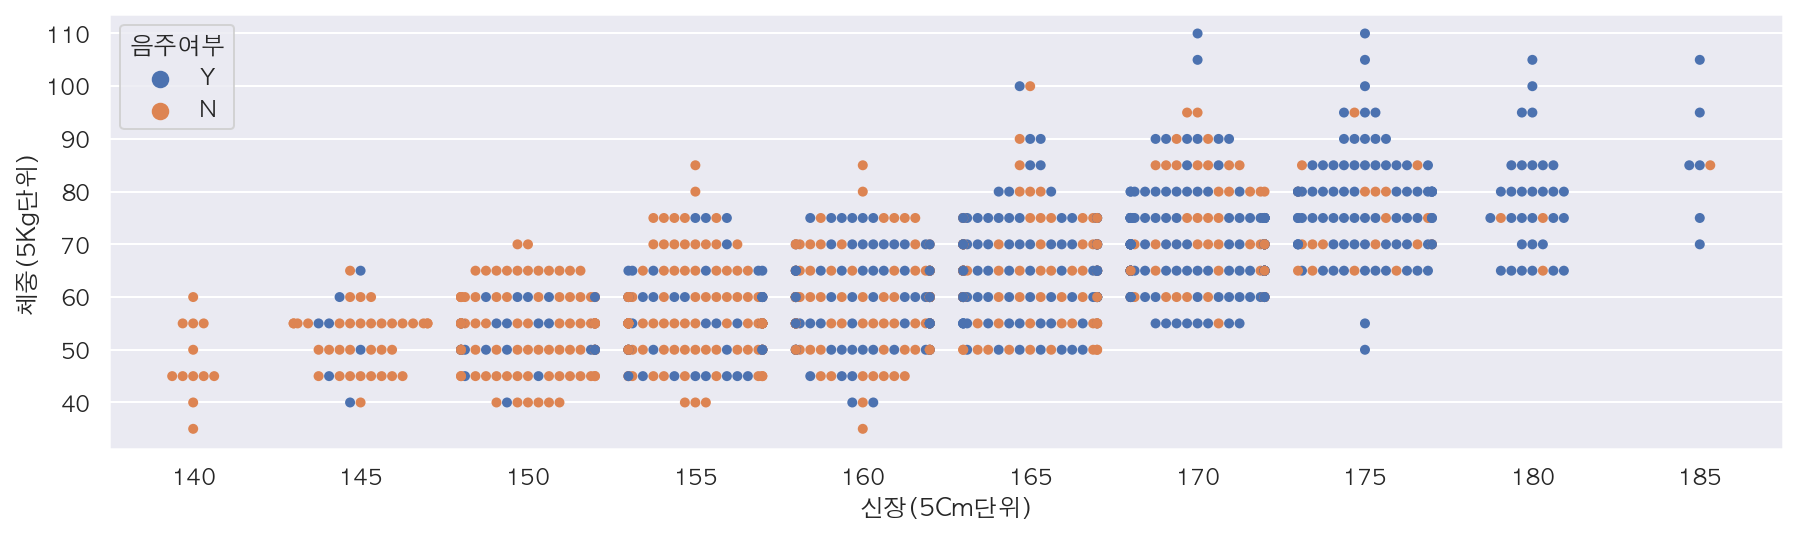

In [52]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", 
               y="체중(5Kg단위)", hue="음주여부")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points ca

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

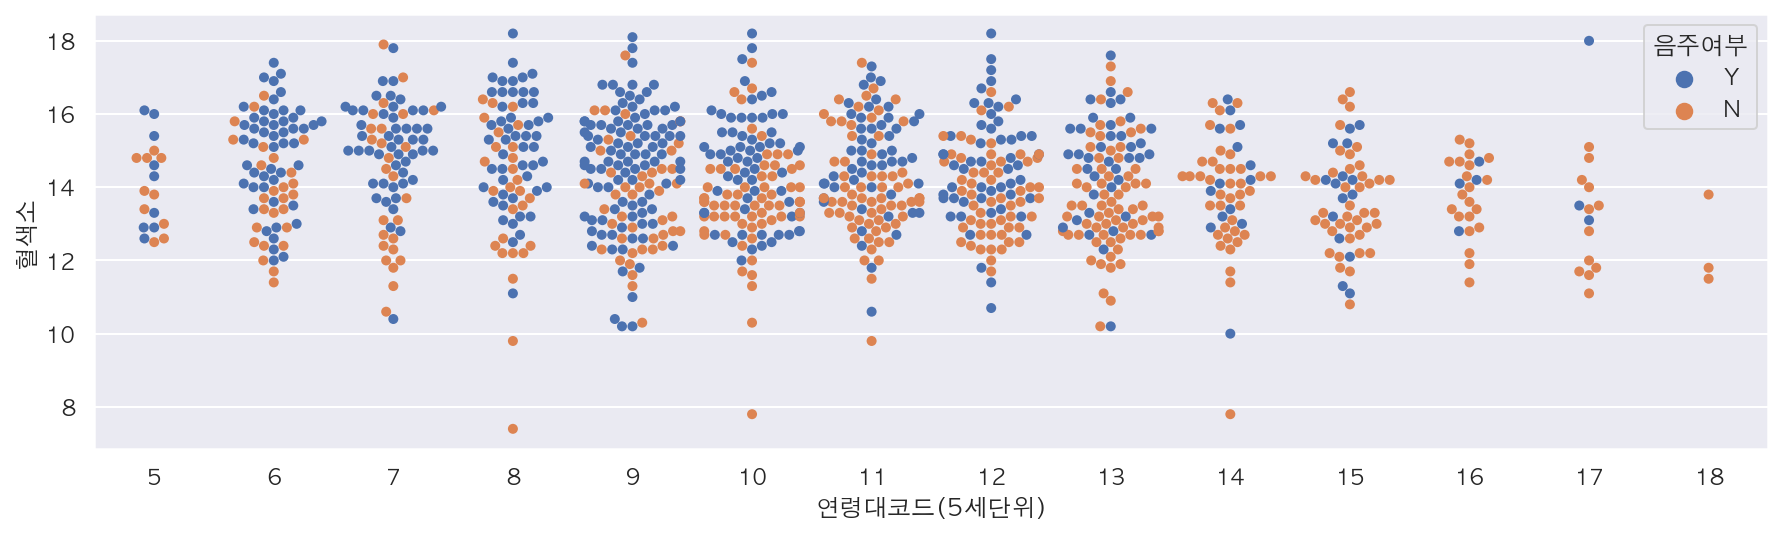

In [53]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", 
               y="혈색소", hue="음주여부")

<Figure size 1080x288 with 0 Axes>

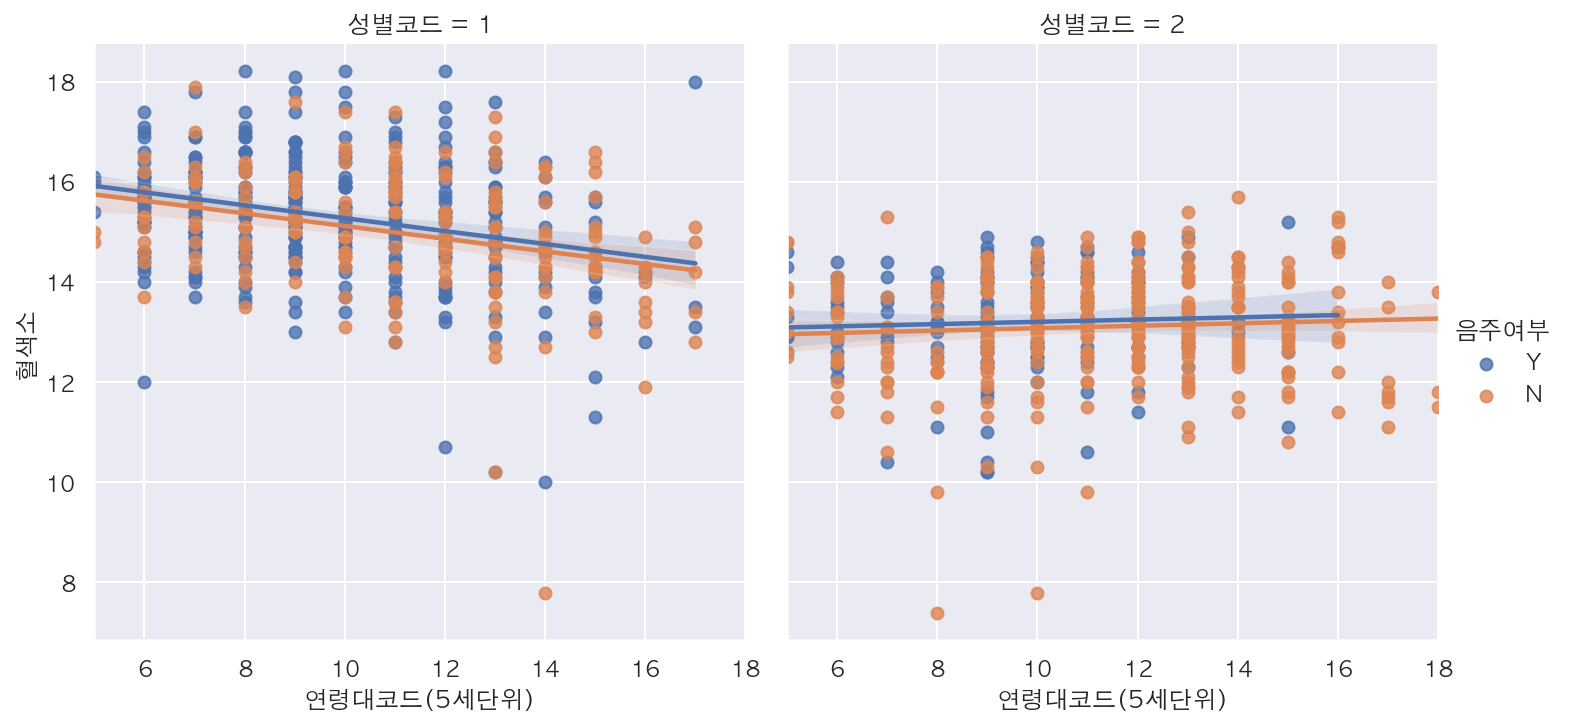

In [54]:
plt.figure(figsize=(15,4))
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

# 15. 수치형 데이터 시각화

## 15.1 scatterplot - 산점도

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

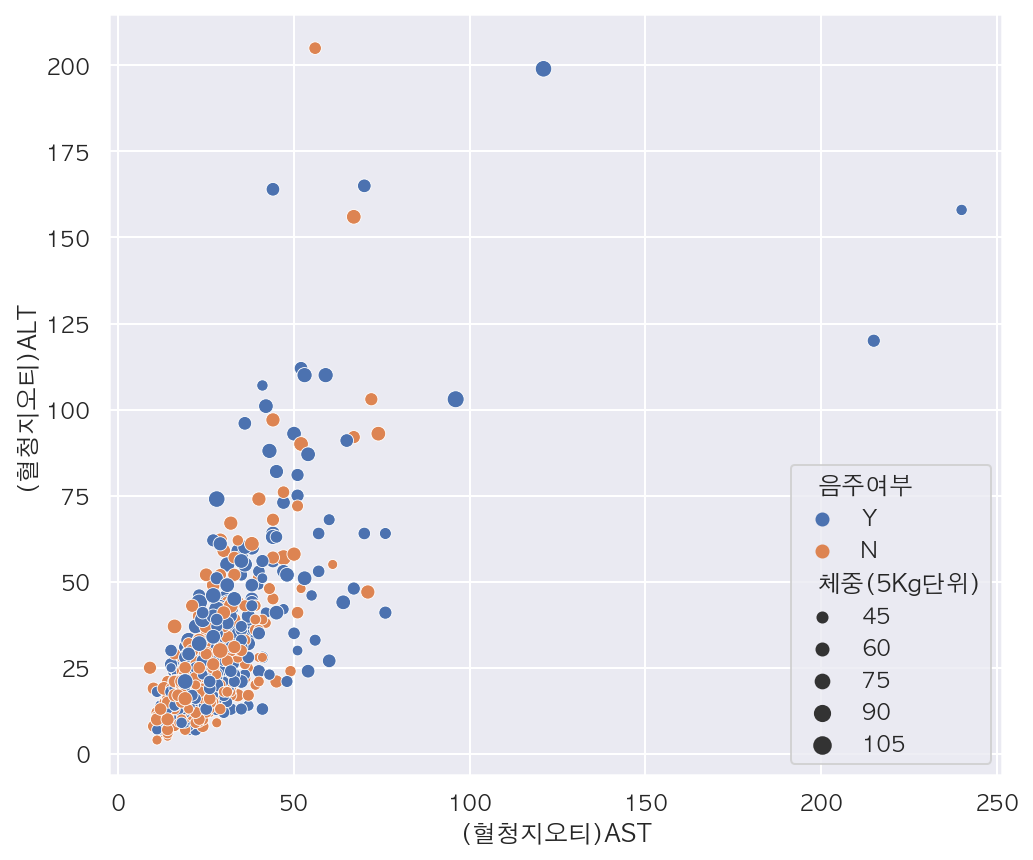

In [55]:
plt.figure(figsize=(8,7))
sns.scatterplot(x="(혈청지오티)AST", y="(혈청지오티)ALT", data=df_sample, 
                hue="음주여부", size="체중(5Kg단위)")

## 15.2 lmplot- 상관관계 보기

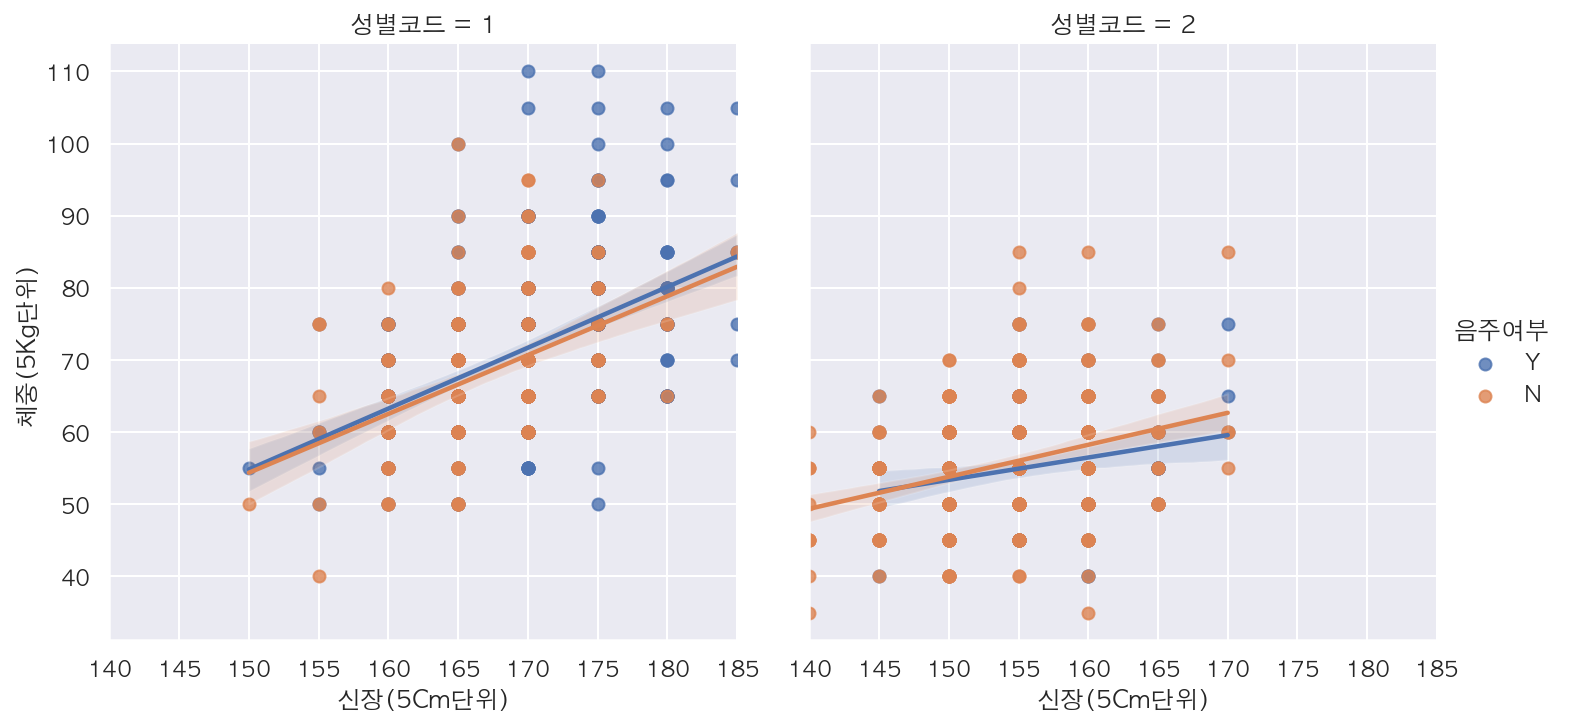

In [56]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)",
           hue="음주여부", col="성별코드")

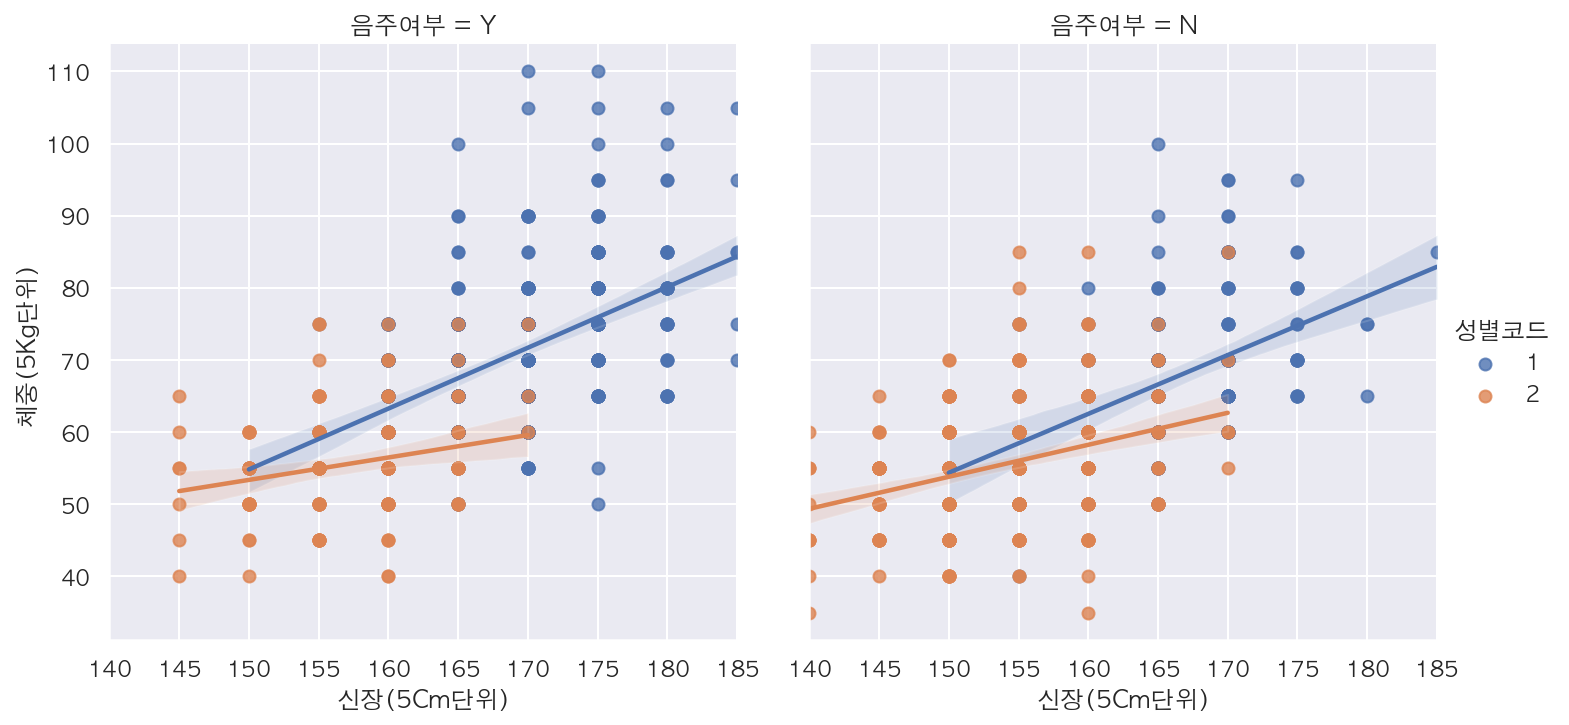

In [57]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)",
           hue="성별코드", col="음주여부")

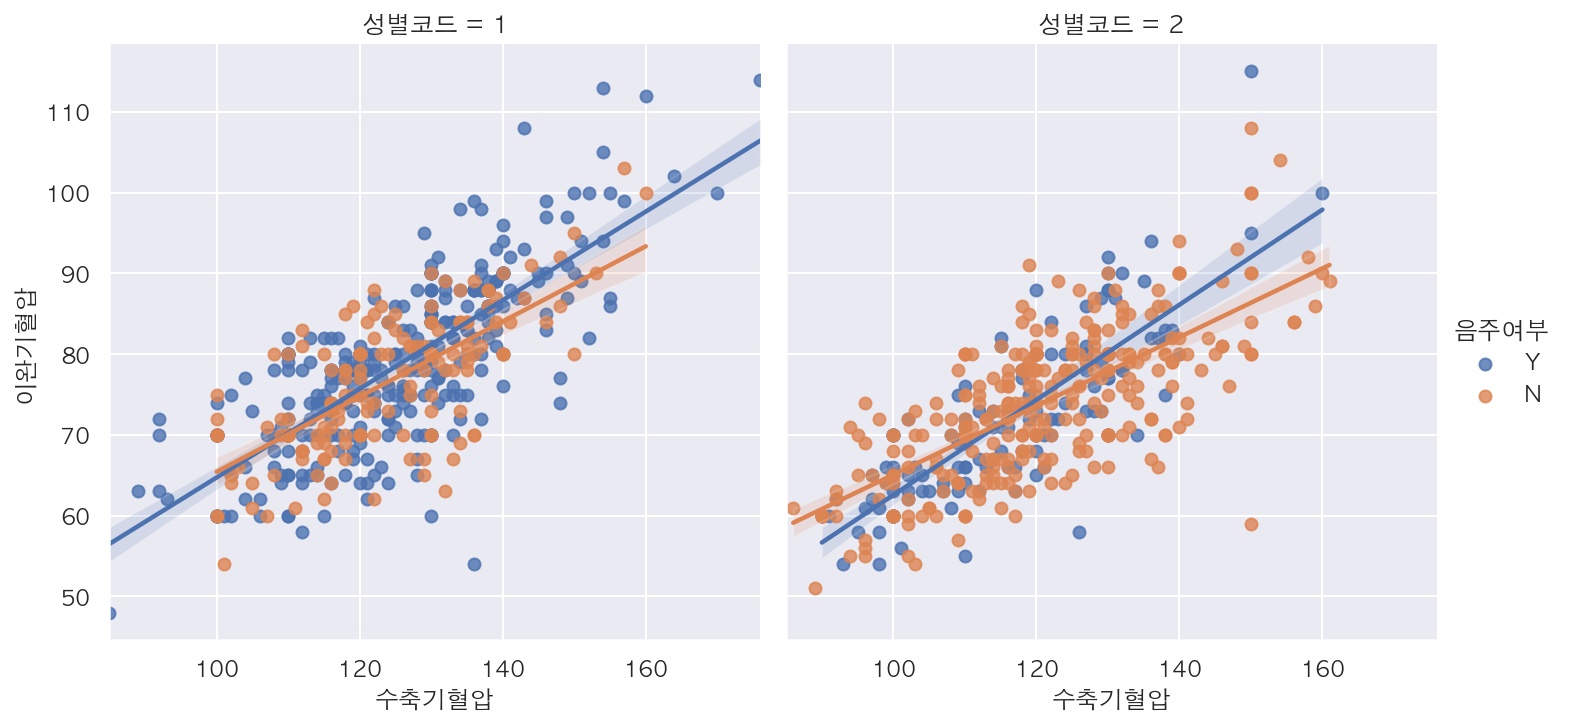

In [58]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압",
           hue="음주여부", col="성별코드")

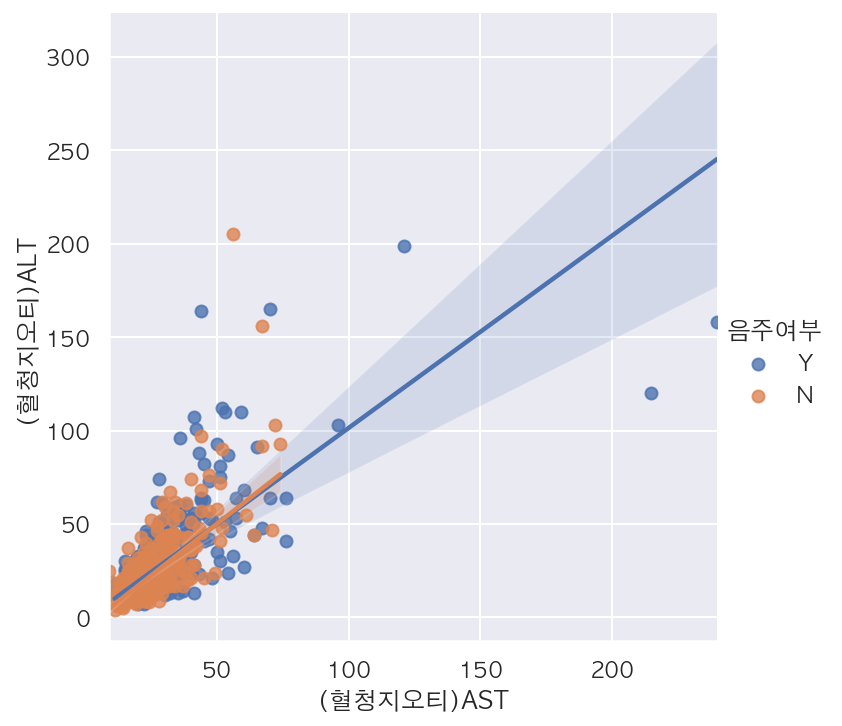

In [59]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", 
           hue="음주여부", robust=True)#이상치 영향 작아짐

## 15.3 이상치 다루기

In [60]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"]<400)
                    & (df_sample["(혈청지오티)ALT"]<400)]

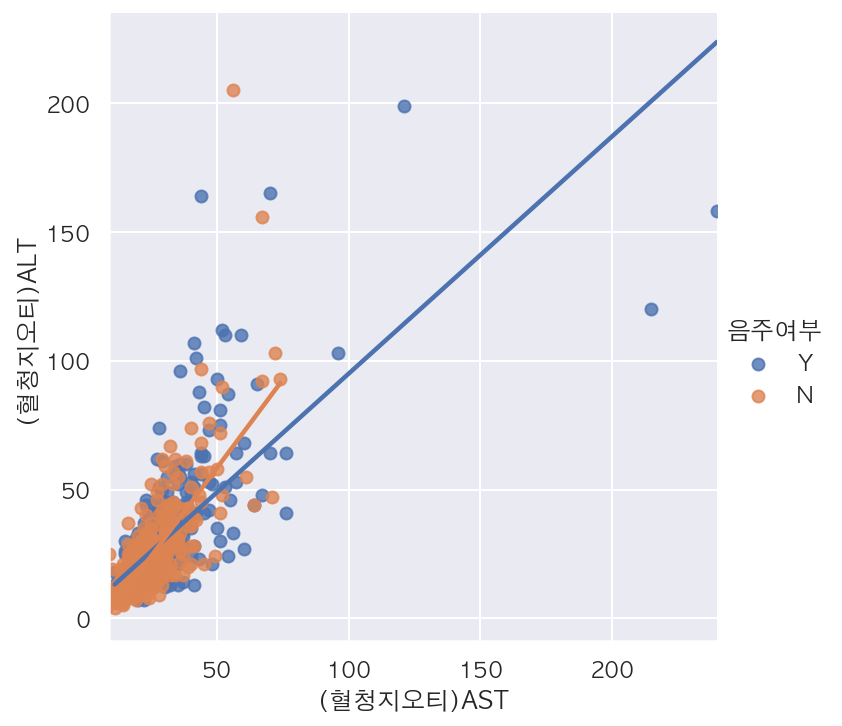

In [61]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [62]:
df_ASLT_high = df[(df["(혈청지오티)AST"]>400)
                    | (df["(혈청지오티)ALT"]>400)]

In [63]:
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
15820   2017    15821     2           13    45        150         55   83.0   
17830   2017    17831     2            8    41        150         50   64.6   
19949   2017    19950     1            6    41        170        105  103.0   
26464   2017    26465     1            7    41        175         70   82.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
992747  2017   992748     2           10    41        165         40   58.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0     Y         N      NaN    NaN   
15820     0.6    1.2  ...  999.0   1.0     Y         N      NaN    NaN   
17830     1.2    1.2  ...  111.0   3.0     Y         Y      NaN    NaN   
19949     1.0    1.2  ...  133.0   1.0     N         N      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0     N         Y      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
982305    0.4    0.7  ...   71.0   1.0     N         N      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0     N         N      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0     Y         N      NaN    NaN   
992747    0.9    0.7  ...  777.0   3.0     Y         N      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
4754        NaN           NaN  NaN  2018-11-26  
15820       NaN           NaN  NaN  2018-11-26  
17830       NaN           NaN    Y  2018-11-26  
19949       NaN           NaN  NaN  2018-11-26  
26464       NaN           NaN    Y  2018-11-26  
...         ...           ...  ...         ...  
982305      NaN           NaN  NaN  2018-11-26  
990867      NaN           NaN  NaN  2018-11-26  
991226      NaN           NaN  NaN  2018-11-26  
992747      NaN           NaN  NaN  2018-11-26  
995323      NaN           NaN  NaN  2018-11-26  

[381 rows x 34 columns]

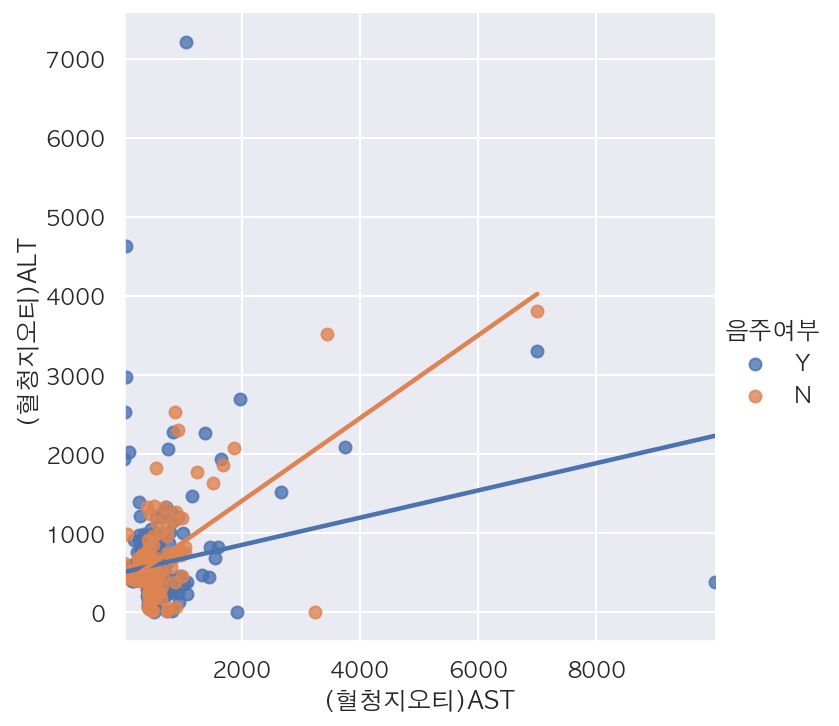

In [64]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [67]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"]>8000]
df_ASLT_high_8000.iloc[:,10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
541757    1.0    1.0   96.0   74.0        93.0   161.0      67.0      78.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태 음주여부  
541757      69.0  15.4  1.0      1.2      9999.0       380.0  419.0   3.0    Y

## 15.4 distplot 

* 히스토그램 & 확률밀도 함수

In [68]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [73]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

In [77]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

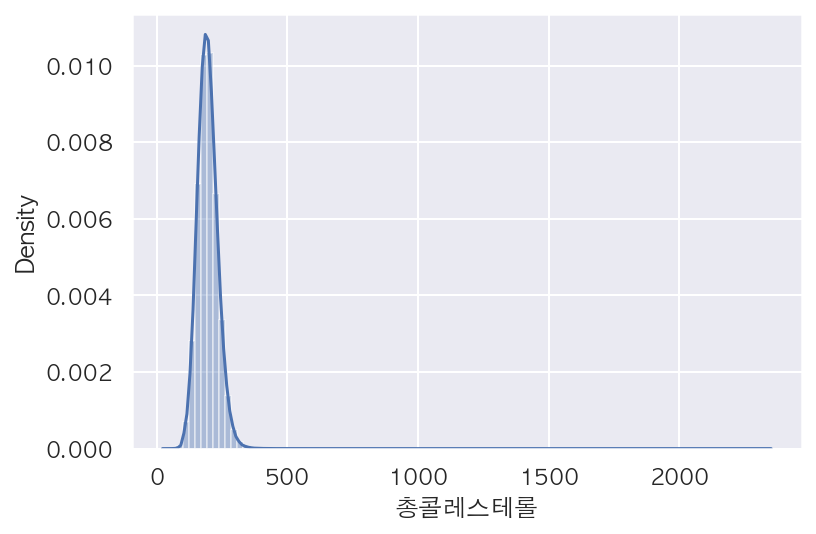

In [76]:
sns.distplot(df_chol, bins=100) #결측치가 있으면 출력 불가능, series형태를 넣어줘야함

In [78]:
df_chol

0         193.0
1         228.0
2         136.0
3         201.0
4         199.0
          ...  
999995    198.0
999996    133.0
999997    205.0
999998    122.0
999999    225.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

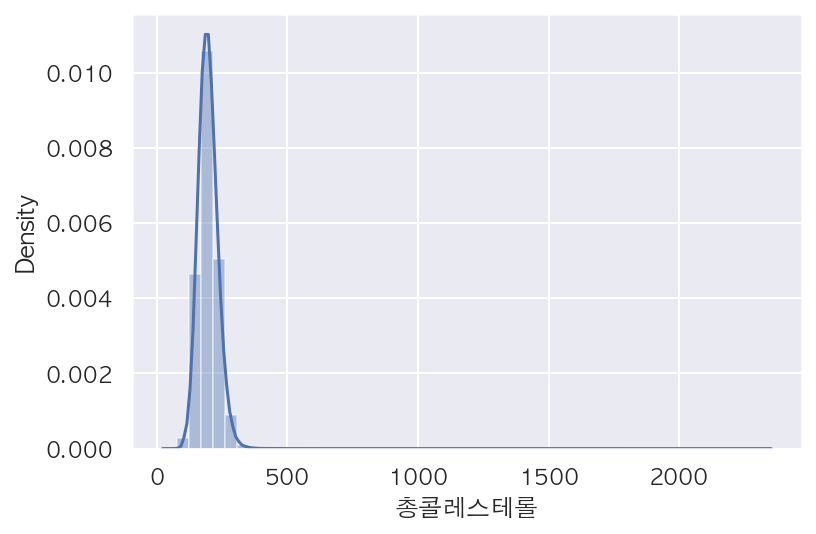

In [82]:
sns.distplot(
    df.loc[df["총콜레스테롤"].notnull()
           &(df["음주여부"]=='Y'), 
           "총콜레스테롤"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

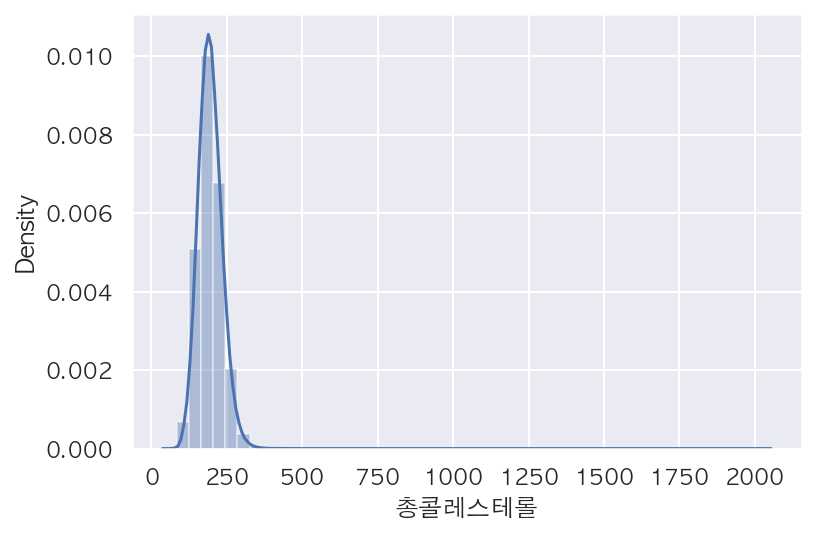

In [83]:
sns.distplot(
    df.loc[df["총콜레스테롤"].notnull()
           &(df["음주여부"]=='N'), 
           "총콜레스테롤"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

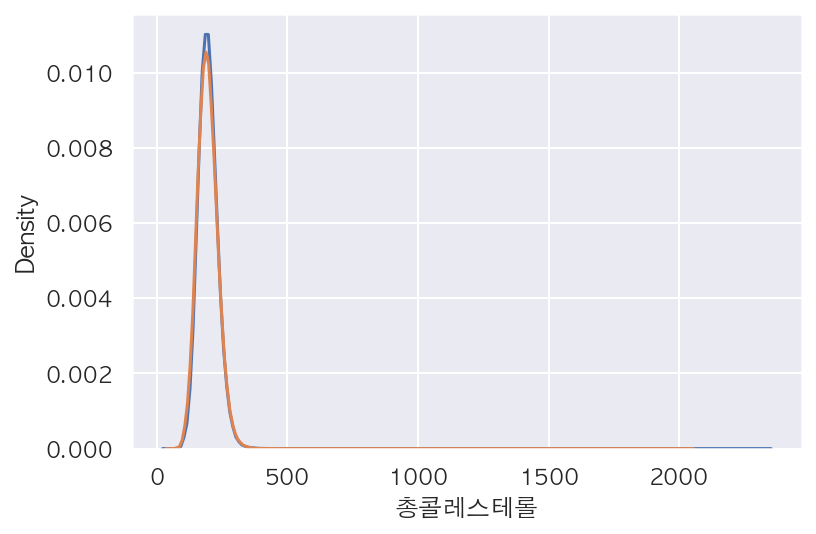

In [85]:
sns.distplot(
    df.loc[df["총콜레스테롤"].notnull()
           &(df["음주여부"]=='Y'), 
           "총콜레스테롤"], hist=False)
sns.distplot(
    df.loc[df["총콜레스테롤"].notnull()
           &(df["음주여부"]=='N'), 
           "총콜레스테롤"], hist=False)

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

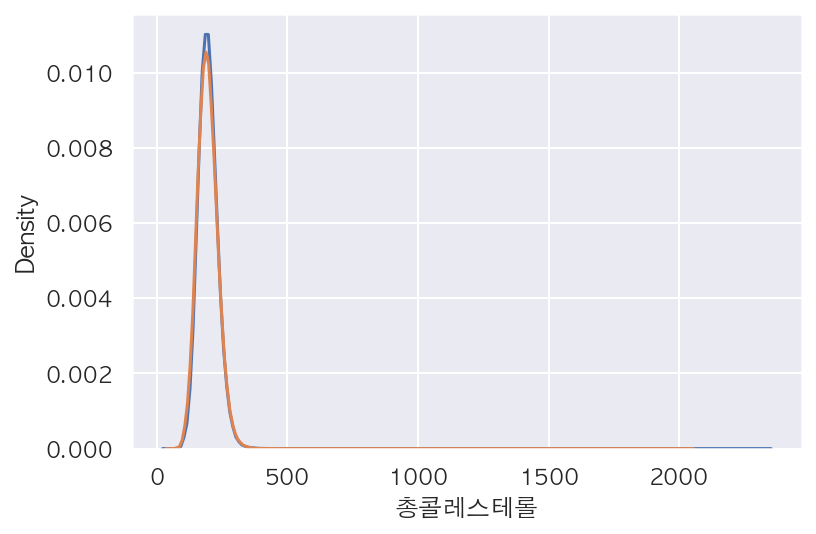

In [86]:
sns.kdeplot(
    df.loc[df["총콜레스테롤"].notnull()
           &(df["음주여부"]=='Y'), 
           "총콜레스테롤"], label="음주 중")
sns.kdeplot(
    df.loc[df["총콜레스테롤"].notnull()
           &(df["음주여부"]=='N'), 
           "총콜레스테롤"], label = "음주 안 함")

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

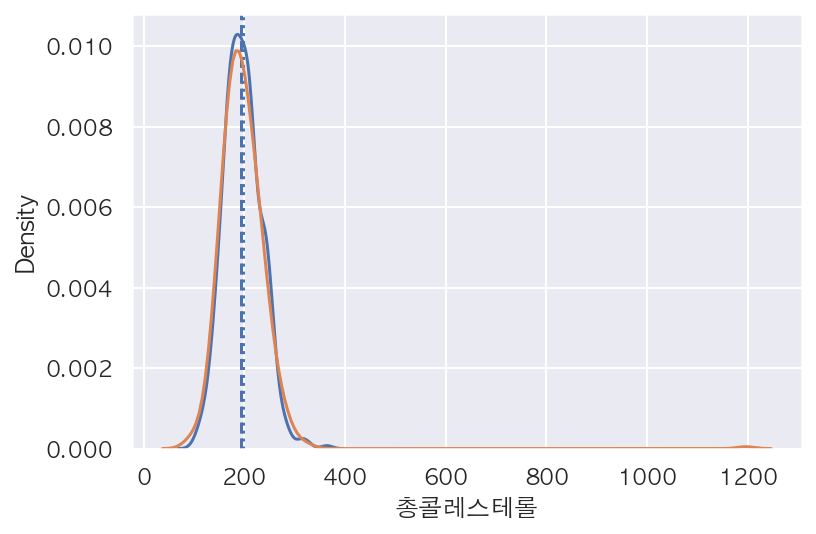

In [92]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle = ":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc
            [df_sample["총콜레스테롤"].notnull() & (df_sample["음주여부"]=="Y"), 
           "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc
            [df_sample["총콜레스테롤"].notnull() & (df_sample["음주여부"]=="N"), 
           "총콜레스테롤"], label = "음주 안 함")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

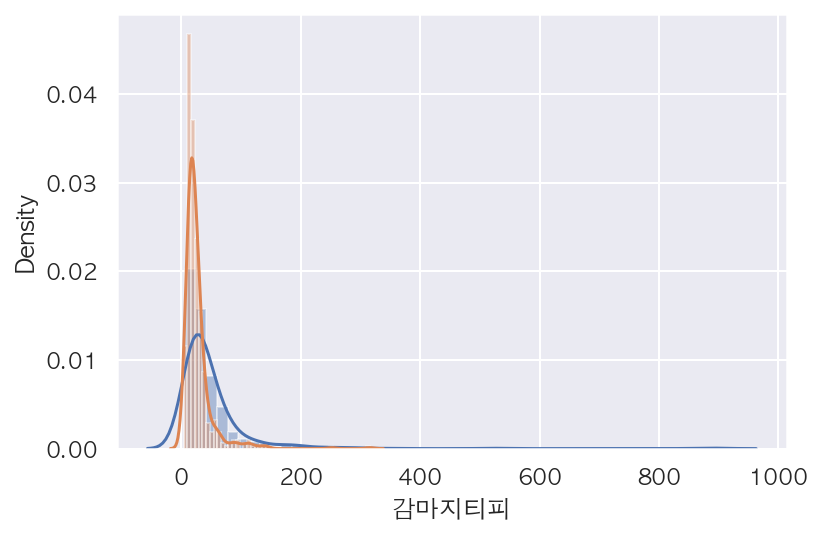

In [100]:
s_1 = df_sample.loc[df_sample["음주여부"]=="Y", "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"]=="N", "감마지티피"]

sns.distplot(s_1, label="음주 O")
sns.distplot(s_0, label="음주 X")

# 16. 상관 분석

## 16.1 상관계수 구하기

In [124]:
columns = ['연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부']
columns

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [110]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr #corr를 통해 상관관계 구하기

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.380239  -0.200336  0.159797 -0.217613 -0.308829   
신장(5Cm단위)      -0.380239   1.000000   0.665067  0.312230  0.202426  0.236260   
체중(5Kg단위)      -0.200336   0.665067   1.000000  0.785950  0.122194  0.168929   
허리둘레            0.159797   0.312230   0.785950  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.202426   0.122194  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.236260   0.168929  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.064044  -0.043727  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.074738  -0.047717  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.063929   0.288983  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.157810   0.324783  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.005997   0.164926  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847  -0.004133   0.050713  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.135087   0.260689  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.207537  -0.330577 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.008146   0.043839  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.541155   0.540191  0.377673  0.142582  0.190303   
요단백             0.058702  -0.007699   0.012154  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.212811   0.170468  0.131421  0.022175  0.080797   
(혈청지오티)AST      0.129357   0.055783   0.193976  0.253549  0.011212  0.003236   
(혈청지오티)ALT     -0.009871   0.159199   0.401756  0.407063  0.080793  0.123455   
감마지티피          -0.015357   0.185091   0.246924  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.512294   0.392874  0.246296  0.141441  0.089486   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  트리글리세라이드  HDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ...  0.037474 -0.095972   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ...  0.135087 -0.207537   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ...  0.260689 -0.330577   
허리둘레         0.050644  0.073086  0.349219  0.329256  ...  0.267643 -0.311478   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ...  0.032493 -0.045579   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ...  0.070753 -0.068572   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ...  0.018695 -0.047898   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ...  0.034650 -0.069527   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ...  0.233447 -0.093036   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ...  0.225436 -0.091701   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ...  0.230639 -0.132477   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.230012  0.025190   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ...  1.000000 -0.312560   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ... -0.312560  1.000000   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ...  0.064503 -0.162307   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ...  0.220292 -0.252492   
요단백          0.041231  0.081749  0.043110  0.035826  ...  0.083164 -0.058606   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ...  0.040199 -0.141626   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ...  0.153717 -0.060252   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ...  0.202813 -0.169802   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ...  0.271554 -0.067822   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ...  0.154560 -0.213555   

             LDL콜레스테롤       혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  \
연령대코드(5세단위)  0.008560 -0.178977  0.058702  0.044958    0.129357   -0.009871   
신장(5Cm단위)    0.008146  0.541155 -0.007699  0.212811    0.055783    0.159199   
체중(5Kg단위)    0.043839  0.540191  0.012154  0.170468    0.193976    0.401756   
허리둘레         0.

In [127]:
df_corr["혈색소"].sort_values()

HDL콜레스테롤      -0.252492
연령대코드(5세단위)   -0.178977
청력(우)         -0.050208
청력(좌)         -0.000433
요단백            0.039249
LDL콜레스테롤       0.068631
총콜레스테롤         0.087261
혈청크레아티닌        0.108274
식전혈당(공복혈당)     0.124883
시력(좌)          0.142582
수축기혈압          0.169241
시력(우)          0.190303
트리글리세라이드       0.220292
(혈청지오티)AST     0.224768
감마지티피          0.245109
이완기혈압          0.255690
(혈청지오티)ALT     0.331891
허리둘레           0.377673
흡연상태           0.434467
체중(5Kg단위)      0.540191
신장(5Cm단위)      0.541155
혈색소            1.000000
Name: 혈색소, dtype: float64

In [128]:
df_corr["혈색소"].sort_values(ascending=False).head(5)

혈색소          1.000000
신장(5Cm단위)    0.541155
체중(5Kg단위)    0.540191
흡연상태         0.434467
허리둘레         0.377673
Name: 혈색소, dtype: float64

## 16.2 heatmap

<AxesSubplot:>

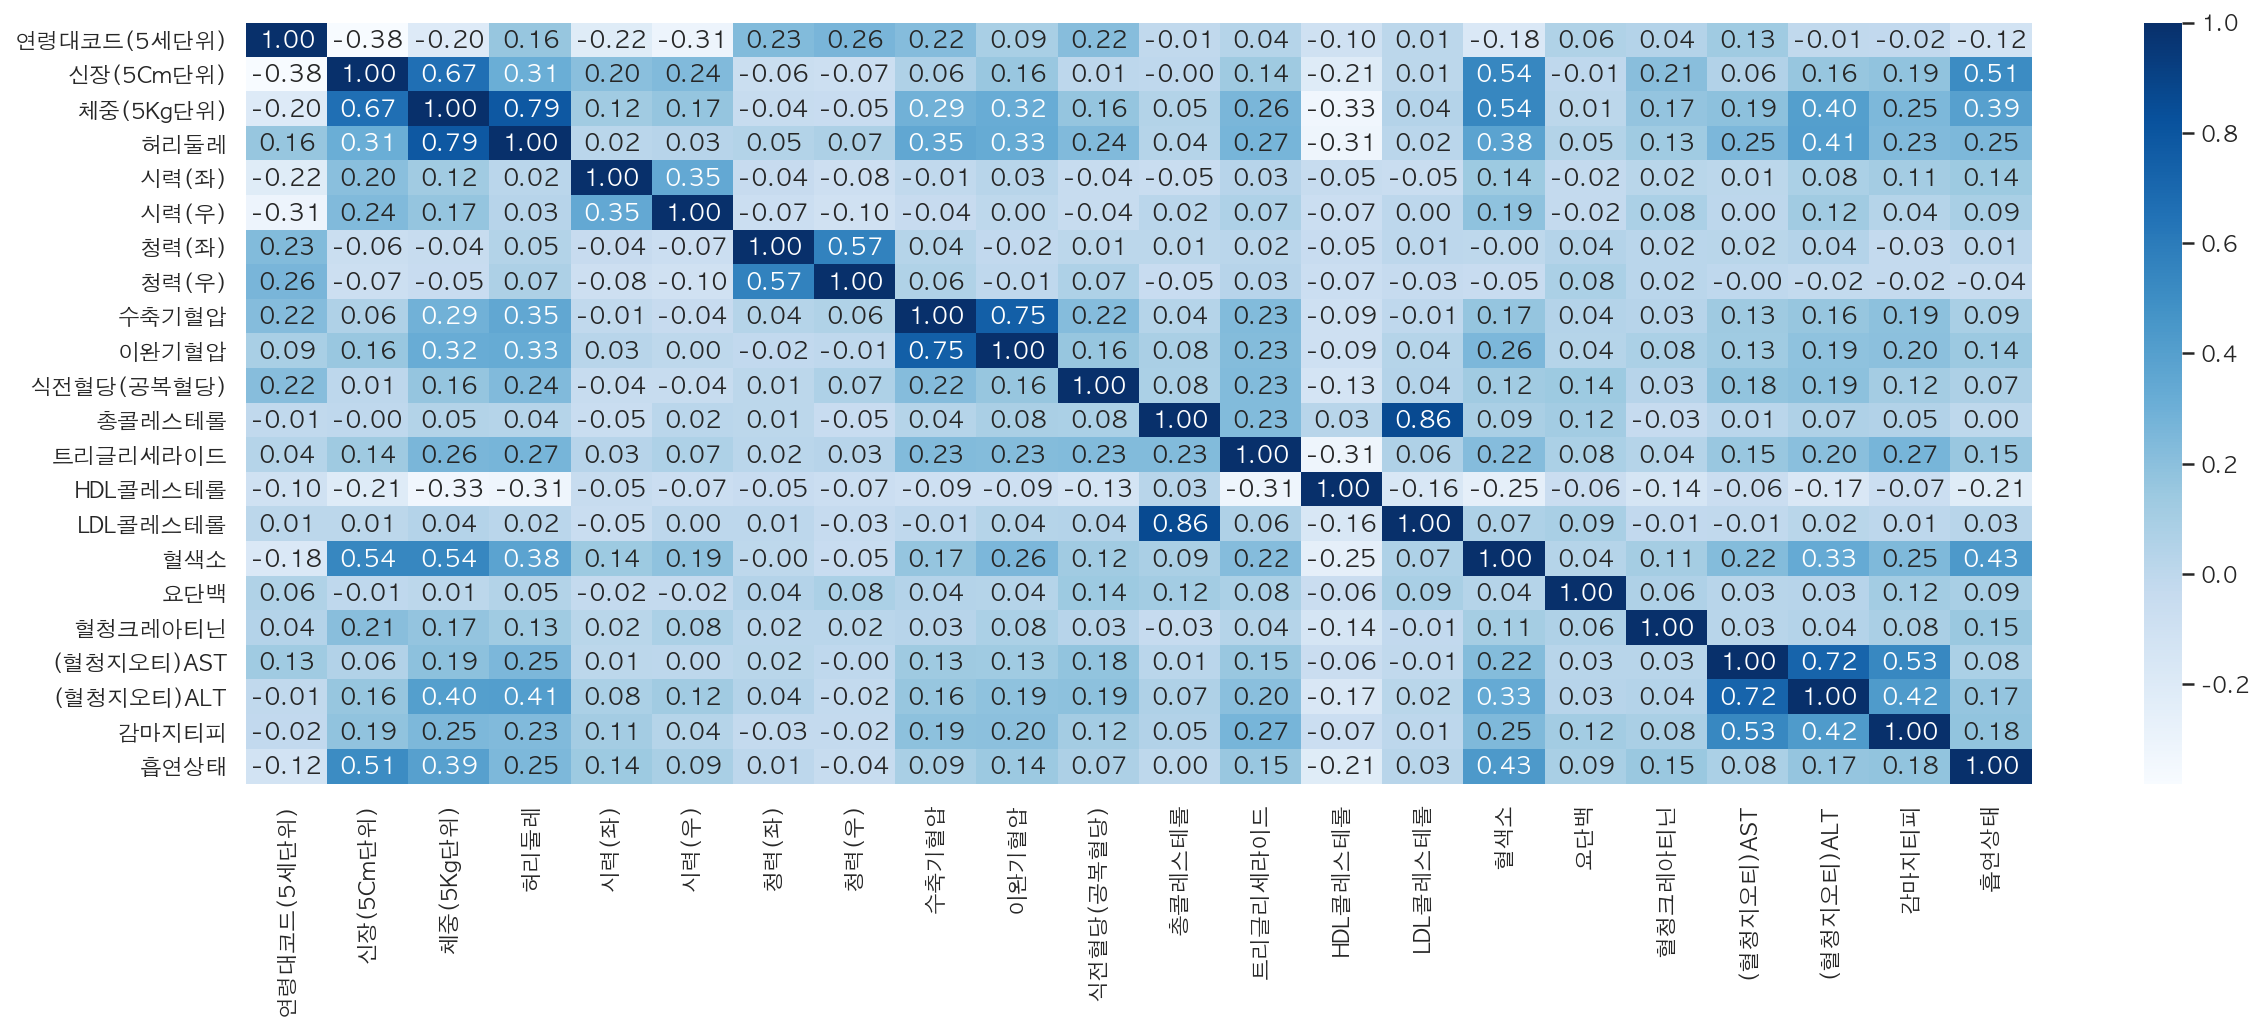

In [133]:
plt.figure(figsize= (20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

<AxesSubplot:>

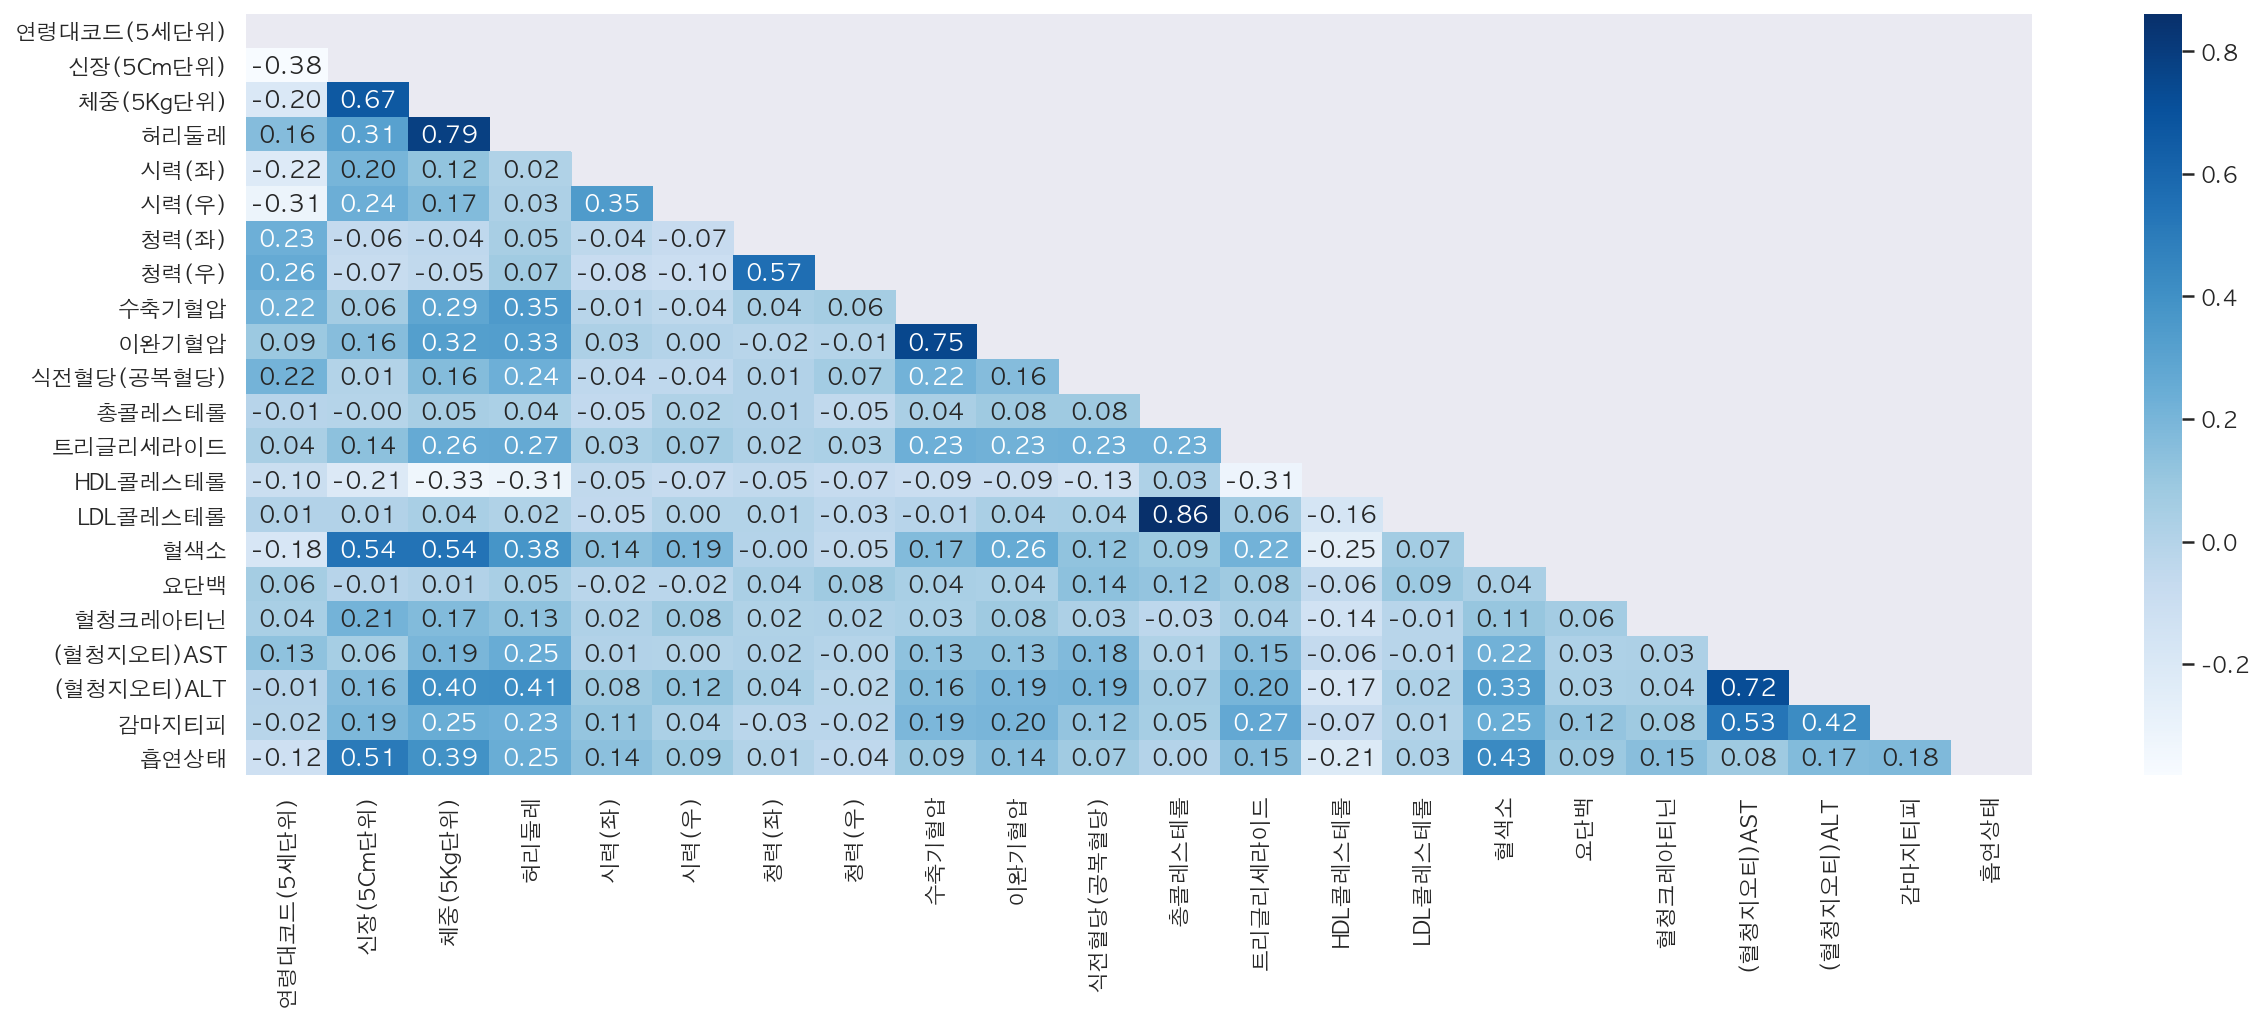

In [137]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize= (20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

In [ ]:
plt.figsiz